# Cyclistic Case Study
### Converting Casual Riders to Annual Members
#### By Martin Baffico Balharry

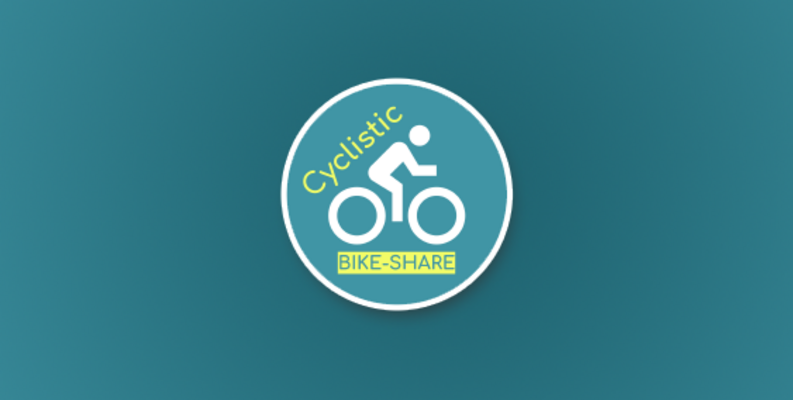
#### [Presentation](https://1drv.ms/p/c/1b836dda743e3ab0/ESvG2Shfm1VEkL6UfKe9V7QBdmurVIYWJznPGiGWRJZTyg?e=vzBf9g) | [Tableau Dashboard](https://public.tableau.com/views/CyclisticCaseStudy_17512988053990/BoostingCyclistcMembershipBase?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)

This case study analyzes historical ride data for Cyclistic, a fictional bike-sharing company, to uncover behavioral patterns that can help convert casual riders into annual members.

The dataset is sourced from Divvy, Chicago’s official bike-share system operated in partnership with Lyft. Though Cyclistic is a fictional brand, Divvy’s data offers a highly realistic representation of urban bike-share usage.

Throughout the project, I apply the full data analysis cycle using SQL and Tableau to clean, organize, explore, and visualize the data.
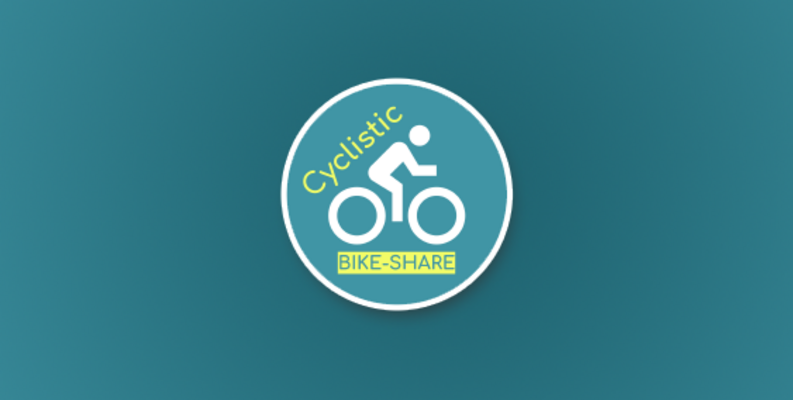

## Introduction
### Understanding Cyclistic and the Membership Challenge
#### Company:
In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a eet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime.

Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members. 

#### Challenge:
 
Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the pricing flexibility helps Cyclistic attract more customers, Moreno believes that maximizing the number of annual members will be key to future growth. Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a solid opportunity to convert casual riders into members. She notes that casual riders are already aware of the Cyclistic program and have chosen Cyclistic for their mobility needs. 

Moreno has set a clear goal: Design marketing strategies aimed at converting casual riders into annual members. In order to do that, however, the team needs to better understand how annual members and casual riders differ, why casual riders would buy a membership, and how digital media could affect their marketing tactics. Moreno and her team are interested in analyzing the Cyclistic historical bike trip data to identify trends.


## Ask: Defining the Problem
#### Who are the players?
**Cyclistic:** A bike-share program that features more than 5,800 bicycles and 600 docking stations. Cyclistic sets itself apart by also offering reclining bikes, hand tricycles, and cargo bikes, making bike-share more inclusive to people with disabilities and riders who can’t use a standard two-wheeled bike. The majority of riders opt for traditional bikes; about 8% of riders use the assistive options. Cyclistic users are more likely to ride for leisure, but about 30% use the bikes to commute to work each day. 

**Lily Moreno:** The director of marketing and your manager. Moreno is responsible for the development of campaigns and initiatives to promote the bike-share program. These may include email, social media, and other channels. 

**Cyclistic marketing analytics team:** A team of data analysts who are responsible for collecting, analyzing, and reporting data that helps guide Cyclistic marketing strategy. You joined this team six months ago and have been busy learning about Cyclistic’s mission and business goals—as well as how you, as a junior data analyst, can help Cyclistic achieve them. 

**Cyclistic executive team:** The notoriously detail-oriented executive team will decide whether to approve the recommended marketing program.

#### The Business Task
Analyze how annual members and casual riders use Cyclistic bikes differently to identify patterns that will help the marketing team launch a campaign aimed at convincing casual riders to purchase an annual membership.

Some questions that will help drive the analysis are: 

* Does one group ride more on weekends vs. weekdays?
* Do annual members take longer or more frequent rides than casual riders?
* What bike types does each category prefer to use?
* Cyclistic could target promotions during peak casual ridership seasons. Are there seasonal trends in bike usage?
* Certain stations might attract more casual riders vs. members, influencing marketing strategies. What does the map density of bike usage look like?

Using these questions as a guide will help uncover key differences between annual members and casual riders, providing the foundation to determine where the marketing campaign should focus. These insights will help effectively persuade casual riders to convert to annual members.



## Prepare: Obtaining Data that Will Accomplish the Business Task
#### Data Used
The study used monthly Divvy bike trip data from January 2024 to December 2024. The data is available on the Divvy bike website[1] and made available for public use by Motivate International Inc. under the Divvy Data License Agreement[2]. 

The data is presented in CSV format, structured into rows and columns in a wide layout. Each row represents a single trip entry, and each month is stored in its own CSV file, containing 13 columns:

| Column Name | Data Type | Description |
| --- | --- | --- |
| ride_id | String | Unique identifier for each ride |
| rideable_type | String | What type of bike was ridden on the trip |
| started_at | Timestamp | Time at which the trip started |
| ended_at | Timestamp | Time at which the trip ended |
| start_station_name | String | Name of the station at which the trip started |
| start_station_id | String | Unique identifier of the station at which the trip started |
| end_station_name | String | Name of the station at which the trip ended |
| end_station_id | String |  Unique identifier of the station at which the trip ended |
| start_lat | Float | Starting latitude of the trip |
| start_lng | Float | Starting longitude of the trip |
| end_lat | Float | Ending latitude of the trip |
| end_lng | Float | Ending longitude of the trip |
| memeber_casual | String | Denotes if the rider is an annual member or a casual rider |


[1]: Divvy bike website: https://divvybikes.com/system-data

[2]: Link to the license agreement: https://divvybikes.com/data-license-agreement

#### Data Credibility
The study uses first-party data reported by Bikeshare on every bike trip recorded in their system over the timeframe selected for the analysis, ensuring an accurate and complete dataset. To prevent outliers from skewing the data, Bikeshare did not include trips under 60 seconds in length, considering them “false starts”.  Additionally, Bikeshare processed the data to remove trips that are taken by staff as they service and inspect the system.

The dataset provides all the necessary information to identify usage trends and differences between rider types, making it comprehensive. Additionally, because the data is from 2024, it remains current at the time of this analysis (June 2025), ensuring any insights gathered are relevant. Since it is publicly available on the Divvy bike website, the source is highly credible and is vetted by the city of Chicago, as mentioned in the Data License Agreement. The data used in this analysis meets the ROCCC criteria, ensuring accuracy, relevance, and completeness. Based on this, it can be confidently inferred that the data will provide meaningful insights to help solve the business task.

#### Data Handling
In accordance with the license agreement for this open dataset, the study will strictly use the data for analysis, leveraging secure platforms such as BigQuery, Google Cloud Storage, and Tableau for storing and processing the data.

Because the dataset is open to the public, all personally identifiable information (PII) has been excluded to protect user privacy. This study will not make any attempts to correlate PII with bike trips and shall respect user privacy. 

#### Potential Problems with the Data
After exploring the data and considering how the different fields can be leveraged, two potential biases were identified that might impact the results of the analysis:

* Unequal distribution of bike stations, causing some neighborhoods to be overrepresented compared to others. 
* PII privacy prevents the analysis from accounting for who is riding the bike, where certain groups might be underrepresented. 


## Process: Getting the Data Ready for Analysis
#### Data Tools
Each CSV file holds one month’s worth of raw data, which includes tens of thousands of records, and there are 12 files total (one per month). Because of the large amount of data, and there being 12 separate files with data, SQL is best suited to clean and analyze the data. It will effectively handle the large amounts of data and can easily work with multiple tables to join and aggregate the data. BigQuery will be the tool of choice for this case.

When data is uploaded to Google Cloud Storage (GCS), it can be used to create tables in BigQuery by importing the file directly from GCS. Tables were created for each month, forming 12 tables in total.

#### Validating Data Integrity
The first step is to join all 12 tables into a unified dataset to get a holistic picture of the data and streamline the cleaning and organizing process. The table for the 12-month period will be named full_year_tripdata.

```sql
CREATE TABLE `nth-infusion-454118-p6.cyclistic_data.full_year_tripdata` AS
SELECT * FROM `nth-infusion-454118-p6.cyclistic_data.Jan_24_tripdata`
UNION ALL
SELECT * FROM `nth-infusion-454118-p6.cyclistic_data.Feb_24_tripdata`
UNION ALL
SELECT * FROM `nth-infusion-454118-p6.cyclistic_data.Mar_24_tripdata`
UNION ALL
SELECT * FROM `nth-infusion-454118-p6.cyclistic_data.Apr_24_tripdata`
UNION ALL
SELECT * FROM `nth-infusion-454118-p6.cyclistic_data.May_24_tripdata`
UNION ALL
SELECT * FROM `nth-infusion-454118-p6.cyclistic_data.Jun_24_tripdata`
UNION ALL
SELECT * FROM `nth-infusion-454118-p6.cyclistic_data.Jul_24_tripdata`
UNION ALL
SELECT * FROM `nth-infusion-454118-p6.cyclistic_data.Aug_24_tripdata`
UNION ALL
SELECT * FROM `nth-infusion-454118-p6.cyclistic_data.Sep_24_tripdata`
UNION ALL
SELECT * FROM `nth-infusion-454118-p6.cyclistic_data.Oct_24_tripdata`
UNION ALL
SELECT * FROM `nth-infusion-454118-p6.cyclistic_data.Nov_24_tripdata`
UNION ALL
SELECT * FROM `nth-infusion-454118-p6.cyclistic_data.Dec_24_tripdata`;
```
Previewing the full-year table reveals key characteristics—specifically, a significant number of null values in the start station ID and name, as well as the end station ID and name. Null values in these columns isn’t necessarily bad, since many Cyclistic bikes can be parked outside of docking stations. Rather than these null values meaning missing data, it means that the bike for the trip the rider used was not in a docking station. 

However, a more concerning issue emerges: 7,232 trips lack a starting or ending latitude/longitude, as identified using an aggregate SQL function:

```sql
SELECT 
  COUNT(*) AS trips_missing_start_or_end_location
FROM 
  `nth-infusion-454118-p6.cyclistic_data.full_year_tripdata`
WHERE
  start_lat IS NULL OR
  start_lng IS NULL OR
  end_lat IS NULL OR
  end_lng IS NULL;
```

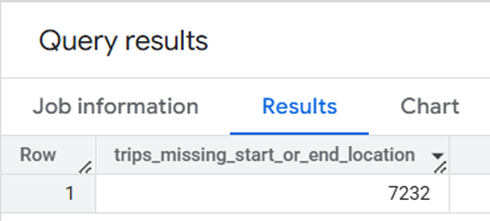

This missing data suggests potential problems with bike GPS functionality, signal loss, or tracking inconsistencies. Another possibility is that these rides were taken on older pedal models that don’t support GPS tracking. To confirm whether GPS failures or bike type inconsistencies are responsible for these gaps, further investigation is needed.

```sql
SELECT 
  COUNT(*) AS trips_missing_start_or_end_location
FROM 
  `nth-infusion-454118-p6.cyclistic_data.full_year_tripdata`
WHERE
  start_station_id IS NULL AND
  (start_lat IS NULL OR
  start_lng IS NULL);
```

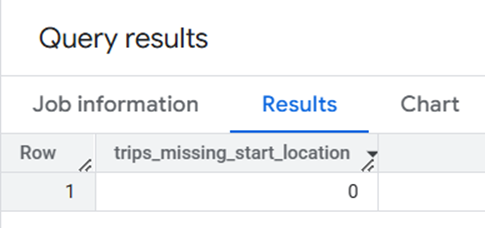

A notable finding is that, among the trips with missing start or end locations, all had a recorded starting station and lat/lng coordinates. This supports the hypothesis that tracking failures occurred during the ride, particularly affecting the end location. Since the ending location was not recorded, it would be risky to assume the trip duration and ending timestamps are accurate.

To ensure data integrity and prevent misleading conclusions, all trips missing an end station and end location will be excluded from the analysis. Removing these data points ensures that the findings reflect accurately recorded travel data, preventing distortions in ride duration metrics and station distribution insights.

```sql
DELETE FROM 
  `nth-infusion-454118-p6.cyclistic_data.full_year_tripdata`
WHERE
  start_lat IS NULL OR
  start_lng IS NULL OR
  end_lat IS NULL OR
  end_lng IS NULL;
```

Previewing the data, we can see that there is inconsistent rounding for the time data across rows:

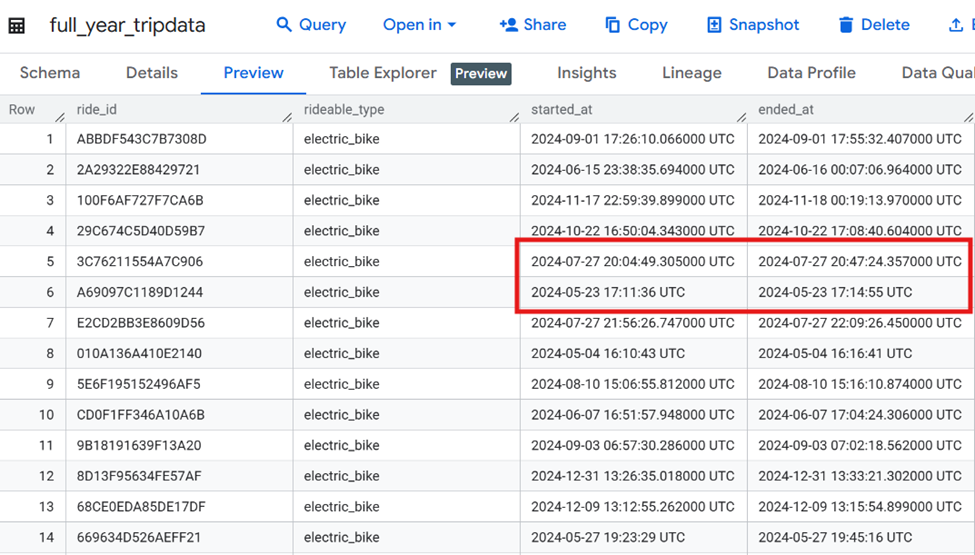

Rounding the start time and end time to the nearest second will standardize time for a more consistent analysis.

```sql
UPDATE `nth-infusion-454118-p6.cyclistic_data.full_year_tripdata`
SET
 started_at = TIMESTAMP_TRUNC(started_at, SECOND),
 ended_at = TIMESTAMP_TRUNC(ended_at, SECOND)
WHERE
  started_at IS NOT NULL AND
  ended_at  IS NOT NULL;
```

Checking for duplicate data is crucial, as it can distort analysis results. One way to identify duplicates is to examine whether any ride IDs appear more than once.

```sql
SELECT 
  ride_id, 
  COUNT(ride_id) AS ride_id_count
FROM 
  `nth-infusion-454118-p6.cyclistic_data.full_year_tripdata`  
GROUP BY 
  ride_id
HAVING 
  ride_id_count > 1;
```
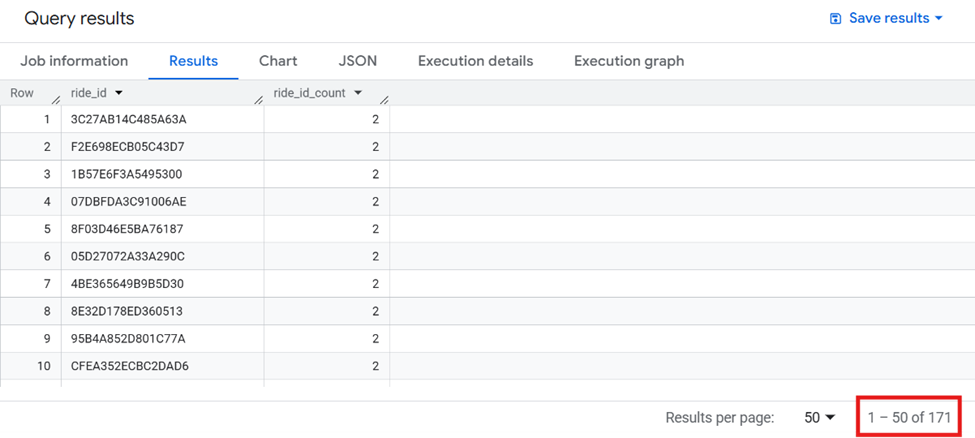

The results say that there are 171 duplicate rides. In other words, there are 171 ride IDs that have a count larger than 1. While it is not a large number when in perspective to our whole table, upholding data integrity principles is important to ensure the data is as accurate as possible. 

```sql
CREATE OR REPLACE TABLE `nth-infusion-454118-p6.cyclistic_data.full_year_tripdata` AS 
(SELECT 
  DISTINCT ride_id,
  rideable_type,
  started_at,
  ended_at,
  start_station_name,
  start_station_id,
  end_station_name,
  end_station_id,
  start_lat,
  start_lng,
  end_lat,
  end_lng,
  member_casual
FROM 
  `nth-infusion-454118-p6.cyclistic_data.full_year_tripdata`);
```

Finally, it is worth checking if any datapoints have a start time greater than the end time. Since the end time should always be later than the start time, any cases where this condition is violated would result in a negative ride duration. Such inconsistencies are unrealistic and can distort the accuracy of the dataset.

```sql
SELECT
  COUNT(*) AS incorrect_end_times
FROM
  `nth-infusion-454118-p6.cyclistic_data.full_year_tripdata`
WHERE
  ended_at < started_at;
```
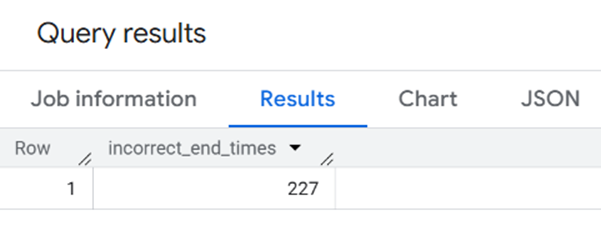

There are 227 rows that have an end time greater than their start time. Those rows will be deleted to ensure data integrity.

```sql
DELETE FROM
 `nth-infusion-454118-p6.cyclistic_data.full_year_tripdata`
WHERE
  ended_at < started_at;
```
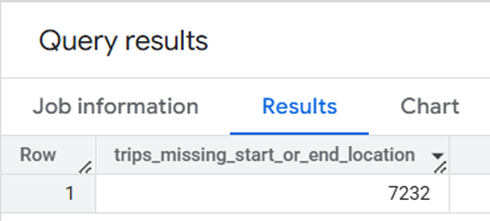
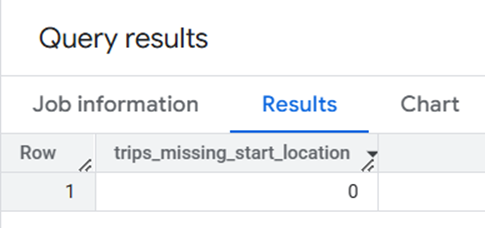
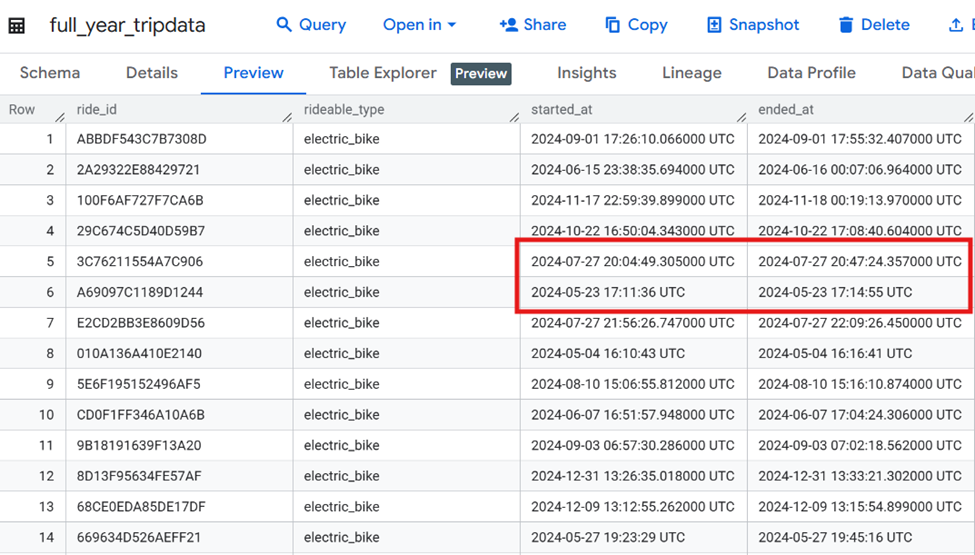
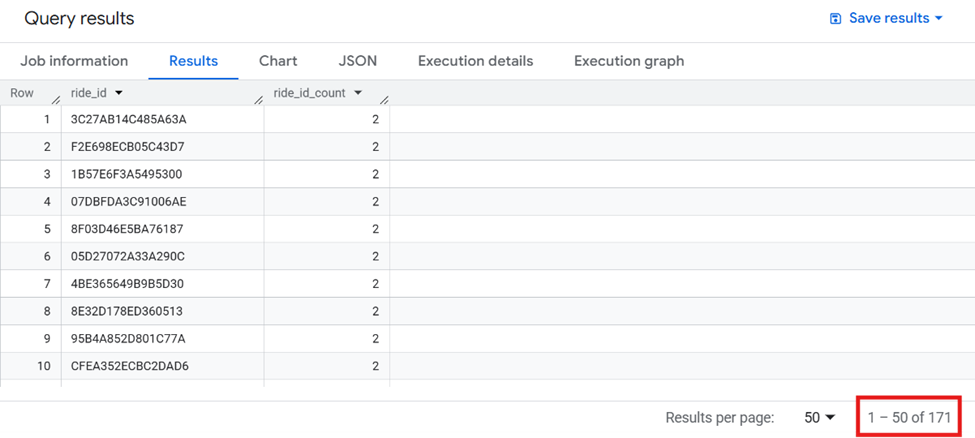
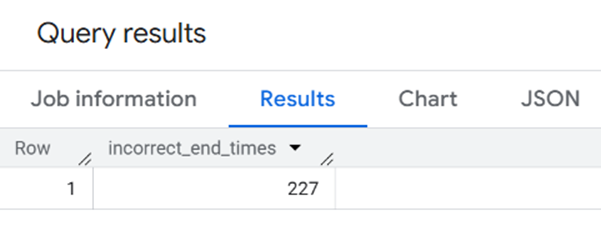

#### Data Transformation

To address key questions about bike usage and trends, the analysis will focus on assessing trip length across different metrics. Data is available on the starting and ending instant of the trip, but there isn’t a variable to analyze the length of the trip. A new column will be created to measure the trip length.

```sql
ALTER TABLE `nth-infusion-454118-p6.cyclistic_data.full_year_tripdata`  
ADD COLUMN ride_length INT64
;

UPDATE `nth-infusion-454118-p6.cyclistic_data.full_year_tripdata`
SET ride_length = TIMESTAMP_DIFF(ended_at, started_at, SECOND)
WHERE
  ride_length IS NULL
;
```

Examining bike usage across different days of the week can reveal important trends in demand. To better understand these patterns, the next step is to create a column that identifies the day of the week for each ride.

```sql
ALTER TABLE `nth-infusion-454118-p6.cyclistic_data.full_year_tripdata` 
ADD COLUMN day_of_week STRING
;

UPDATE `nth-infusion-454118-p6.cyclistic_data.full_year_tripdata`
SET day_of_week =   CASE  
    WHEN EXTRACT(DAYOFWEEK FROM started_at) = 1 THEN 'Sunday'  
    WHEN EXTRACT(DAYOFWEEK FROM started_at) = 2 THEN 'Monday'  
    WHEN EXTRACT(DAYOFWEEK FROM started_at) = 3 THEN 'Tuesday'  
    WHEN EXTRACT(DAYOFWEEK FROM started_at) = 4 THEN 'Wednesday'  
    WHEN EXTRACT(DAYOFWEEK FROM started_at) = 5 THEN 'Thursday'  
    WHEN EXTRACT(DAYOFWEEK FROM started_at) = 6 THEN 'Friday'  
    WHEN EXTRACT(DAYOFWEEK FROM started_at) = 7 THEN 'Saturday'  
END;
```

A column specifically showing the hour of day could also be helpful in discovering trends for bike usage during the day.

```sql
ALTER TABLE `nth-infusion-454118-p6.cyclistic_data.full_year_tripdata`
ADD COLUMN hour_of_day INT64
;

UPDATE `nth-infusion-454118-p6.cyclistic_data.full_year_tripdata`
SET hour_of_day = EXTRACT(HOUR FROM started_at)
WHERE
  hour_of_day IS NULL;
```

The data is ready to be analyzed for insights now that it has been cleaned and formatted correctly to increase accuracy and consistency.

## Analysis: Exploring the Data
Beginning with general metrics and insights establishes a strong foundation for deeper, more detailed analysis. 

```sql
SELECT  
  COUNT(ride_id) AS total_rides, 
  -- The variable below retreives the longest ride and reformats it from seconds to an 'HH:MM:SS' format for improved readibility.
  CONCAT(
    CAST((FLOOR(MAX(ride_length) / 3600)) AS STRING), ':',  
    LPAD(CAST(FLOOR(MOD(MAX(ride_length), 3600) / 60) AS STRING), 2, '0'), ':',  
    LPAD(CAST(MOD(MAX(ride_length), 60) AS STRING), 2, '0')  
  ) AS longest_ride, 
  -- The variable below retreives the average ride length and reformats it from seconds to an 'HH:MM:SS' format for improved readibility.
  CONCAT (
    CAST(ROUND(AVG(ride_length) / 3600) AS STRING), ':',
    LPAD(CAST(FLOOR(MOD(CAST(AVG(ride_length) AS INT64), 3600) / 60) AS STRING), 2, '0'), ':',
    LPAD(CAST(MOD(CAST(AVG(ride_length) AS INT64), 60) AS STRING), 2 , '0')
  ) AS average_ride_length, 
  -- To determine the mode of the day, a subquery first identifies the day with the highest number of trips. The outer query then retrieves that  day as the final result.
  (SELECT 
    day_of_week  
   FROM (  
     SELECT 
      day_of_week, 
      COUNT(*) AS frequency  
     FROM `nth-infusion-454118-p6.cyclistic_data.full_year_tripdata`  
     GROUP BY day_of_week  
     ORDER BY frequency DESC  
     LIMIT 1  
   )  
  ) AS day_mode,
  -- Similarly, the hour mode is retrieved by first identifying the hour of day with most trips in a subquery and then retreiving that day in the outer query.
  (SELECT
    hour_of_day
  FROM
    (SELECT
      COUNT(*) AS frequency,
      hour_of_day
    FROM
      `nth-infusion-454118-p6.cyclistic_data.full_year_tripdata`
    GROUP BY
      hour_of_day
    ORDER BY
      frequency DESC
    LIMIT 1)
      ) AS hour_mode
FROM `nth-infusion-454118-p6.cyclistic_data.full_year_tripdata`;
```

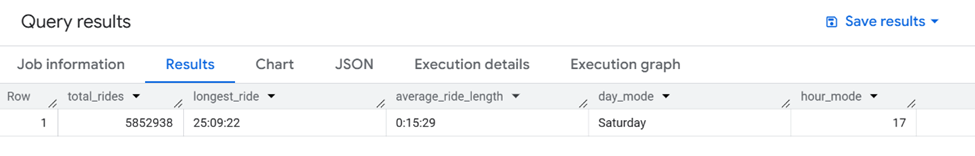

The year summary snapshot will provide a solid baseline for understanding key trends in bike usage, including patterns across different times and days. Overall, Cyclistic bike usage peaks on Saturdays, with the highest demand for bikes on any given day being between 5 and 6 PM. The average ride length suggests that most people use bikes for shorter trips, likely as a mode of transportation rather than leisurely city exploration. Notably, the longest recorded ride lasted 25 hours and 9 minutes, which seems suspiciously high and may be an outlier.

How do these ride statistics differ between annual members and casual riders?

**Annual Members:**

```sql
SELECT  
  COUNT(ride_id) AS total_rides, 
  -- The variable below retreives the longest ride and reformats it from seconds to an 'HH:MM:SS' format for improved readibility.
  CONCAT(
    CAST((FLOOR(MAX(ride_length) / 3600)) AS STRING), ':',  
    LPAD(CAST(FLOOR(MOD(MAX(ride_length), 3600) / 60) AS STRING), 2, '0'), ':',  
    LPAD(CAST(MOD(MAX(ride_length), 60) AS STRING), 2, '0')  
  ) AS longest_ride, 
  -- The variable below retreives the average ride length and reformats it from seconds to an 'HH:MM:SS' format for improved readibility.
  CONCAT (
    CAST(ROUND(AVG(ride_length) / 3600) AS STRING), ':',
    LPAD(CAST(FLOOR(MOD(CAST(AVG(ride_length) AS INT64), 3600) / 60) AS STRING), 2, '0'), ':',
    LPAD(CAST(MOD(CAST(AVG(ride_length) AS INT64), 60) AS STRING), 2 , '0')
  ) AS average_ride_length, 
  -- To determine the mode of the day, a subquery first identifies the day with the highest number of trips. The outer query then retrieves that  day as the final result.
  (SELECT 
    day_of_week  
   FROM (  
     SELECT 
      day_of_week, 
      COUNT(*) AS frequency  
     FROM `nth-infusion-454118-p6.cyclistic_data.full_year_tripdata`  
     GROUP BY day_of_week  
     ORDER BY frequency DESC  
     LIMIT 1  
   )  
  ) AS day_mode,
  -- Similarly, the hour mode is retrieved by first identifying the hour of day with most trips in a subquery and then retreiving that day in the outer query.
  (SELECT
    hour_of_day
  FROM
    (SELECT
      COUNT(*) AS frequency,
      hour_of_day
    FROM
      `nth-infusion-454118-p6.cyclistic_data.full_year_tripdata`
    GROUP BY
      hour_of_day
    ORDER BY
      frequency DESC
    LIMIT 1)
      ) AS hour_mode
FROM `nth-infusion-454118-p6.cyclistic_data.full_year_tripdata`
WHERE
  member_casual = 'member';
```
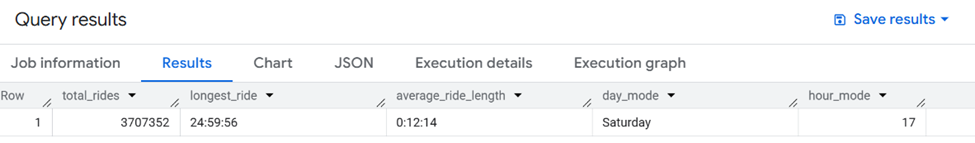

In 2024, annual members accounted for more than half of all Cyclistic bike rides, indicating that they rode more frequently than casual users. Their average trip duration was shorter than the overall mean, suggesting that members primarily used bikes for short-distance transportation rather than leisure. Interestingly, despite the expectation that members would rely on bikes for quick commutes during the workweek, Saturday remained the busiest day for annual member rides, contradicting that hypothesis.

**Casual Riders:**

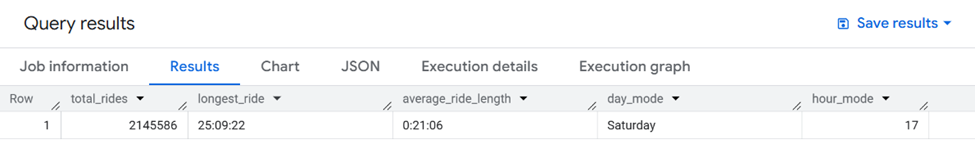

Casual riders, on average, used Cyclistic bikes for longer periods than annual members, with a mean ride duration of approximately 21 minutes. Notably, both casual riders and members displayed similar riding patterns, with the highest bike usage occurring on Saturdays and consistently peaking between 5 PM and 6 PM on any given day.

It is important to highlight that both casual riders and annual members recorded unusually long maximum ride durations, deviating from what the expectation would be for a normal ride duration. Exploring the median ride length for each category could give us further insights into differences in ride length. 

```sql
SELECT 
  DISTINCT median_ride_length, 
  member_casual 
FROM 
  (SELECT 
    CONCAT ( CAST(FLOOR(median_ride_length_sec / 3600) AS STRING), ':',
    LPAD(CAST(FLOOR(MOD(CAST(median_ride_length_sec AS INT64), 3660) / 60) AS STRING), 2, '0'), ':', 
    LPAD(CAST(FLOOR(MOD(CAST(median_ride_length_sec AS INT64), 60)) AS STRING), 2, '0') ) AS median_ride_length,
    member_casual
  FROM 
    (SELECT 
      PERCENTILE_CONT(ride_length, 0.5) OVER (PARTITION BY member_casual) AS median_ride_length_sec,
      member_casual 
    FROM nth-infusion-454118-p6.cyclistic_data.full_year_tripdata));
```

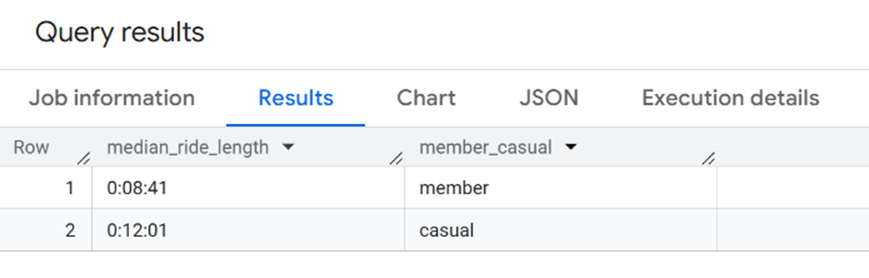

The gap between the median ride lengths of casual riders and annual members is significantly smaller than the difference in their mean ride durations—shrinking from 8 minutes and 52 seconds to just 3 and a half minutes. This indicates that casual riders have occasional extremely long trips, which are inflating the mean and making it less representative of typical ride behavior.

Analyzing bike usage across different days of the week can help uncover key usage patterns and offer valuable insights into user behavior.

**For Annual Members:**

```sql
SELECT 
  day_of_week,
  ROUND(AVG(ride_length)) AS mean_ride_len
FROM 
  `nth-infusion-454118-p6.cyclistic_data.full_year_tripdata`
WHERE
  member_casual = 'member'
GROUP BY 
  day_of_week
ORDER BY
  mean_ride_len DESC;
```
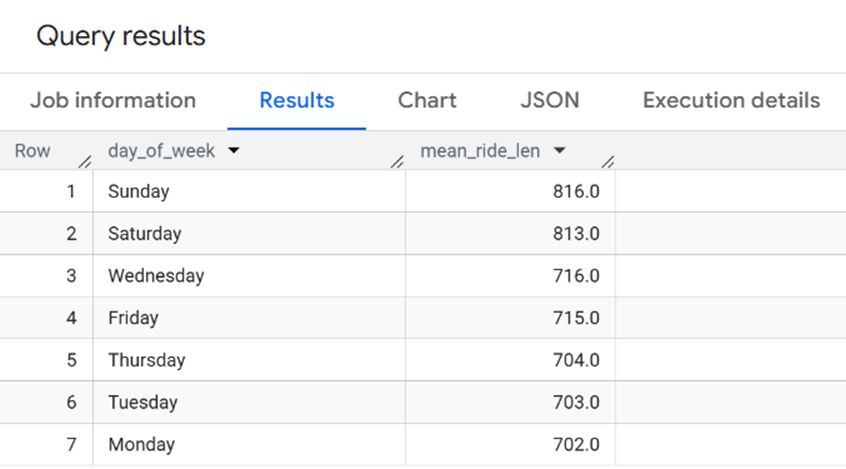

**For Casual Riders:**

```sql
SELECT 
  day_of_week,
  ROUND(AVG(ride_length)) AS mean_ride_len
FROM 
  `nth-infusion-454118-p6.cyclistic_data.full_year_tripdata`
WHERE
  member_casual = 'casual'
GROUP BY 
  day_of_week
ORDER BY
  mean_ride_len DESC;
```
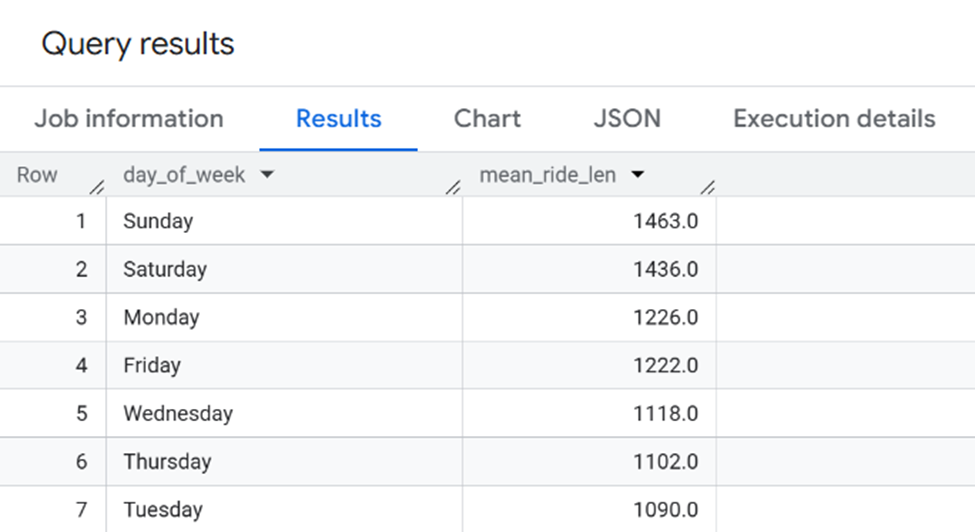

Casual riders consistently take longer trips throughout the week, with notably higher usage and ride duration on weekends—particularly Saturday and Sunday—compared to lower-usage weekdays like Tuesday and Thursday. In contrast, annual members exhibit more consistent ride lengths across all days, reinforcing the idea that their usage is driven by regular commuting rather than leisure. Interestingly, the shorter average ride durations for casual riders during midweek suggest a shift in behavior—some may be using the bikes for commuting rather than sightseeing. This weekday commuter segment could represent a promising target audience for future marketing efforts.

Evaluating bike usage per user type across the different seasons of the year could also provide insights that could be leveraged in a targeted marketing campaign, or at least, to determine user behavior during each season.

**For Annual Members:**
```sql
SELECT
  season,
  COUNT(*) AS number_of_rides,
  ROUND(COUNT(*) * 100.0 / SUM(COUNT(*)) OVER(), 2) AS percent_of_rides
FROM 
  (SELECT
  started_at,
  member_casual,
  CASE
    WHEN started_at BETWEEN TIMESTAMP('2024-01-01 00:00:00 UTC') AND TIMESTAMP('2024-03-20 23:59:59 UTC') THEN 'Winter'
    WHEN started_at BETWEEN TIMESTAMP('2024-03-21 00:00:00 UTC') AND TIMESTAMP('2024-06-20 23:59:59 UTC') THEN 'Spring'
    WHEN started_at BETWEEN TIMESTAMP('2024-06-21 00:00:00 UTC') AND TIMESTAMP('2024-09-22 23:59:59 UTC') THEN 'Summer'
    WHEN started_at BETWEEN TIMESTAMP('2024-09-23 00:00:00 UTC') AND TIMESTAMP('2024-12-20 23:59:59 UTC') THEN 'Fall'
    WHEN started_at BETWEEN TIMESTAMP('2024-12-21 00:00:00 UTC') AND TIMESTAMP('2024-12-31 23:59:59 UTC') THEN 'Winter'
    ELSE 'Unknown'
  END AS season
  FROM
    `nth-infusion-454118-p6.cyclistic_data.full_year_tripdata`)
WHERE
  member_casual = 'member'
GROUP BY
  season
ORDER BY
  number_of_rides DESC;
```
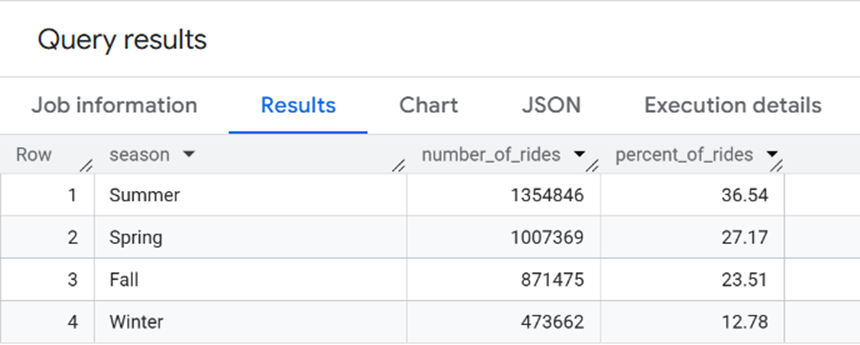

**For Casual Riders:**

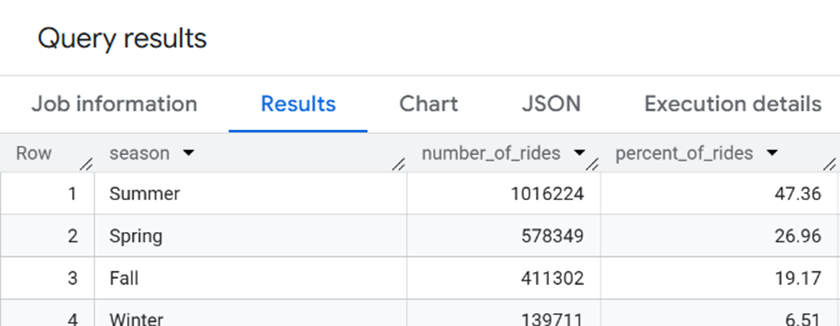

Interestingly, seasonal ride trends are consistent across both user types: summer is the most popular season, while winter sees the least activity. However, usage patterns differ: member rides are more evenly spread throughout the year, whereas nearly half of all casual rides occur during the summer alone. This could be due to visiting tourists during the summer, when the weather is better in Chicago.

Finally, conducting a geographic analysis of user preferences and demand across various areas of Chicago can reveal patterns in Cyclistic bike popularity throughout the city. 

```sql
 SELECT
     start_station_name,
     COUNT(*) AS total_trips,
     SUM(CASE WHEN member_casual = 'member'THEN 1 ELSE 0 END) AS meber_rides,
     SUM(CASE WHEN member_casual = 'casual' THEN 1 ELSE 0 END) AS casual_rides
 FROM
     `nth-infusion-454118-p6.cyclistic_data.full_year_tripdata`
 GROUP BY
     start_station_name
 LIMIT 10;
```
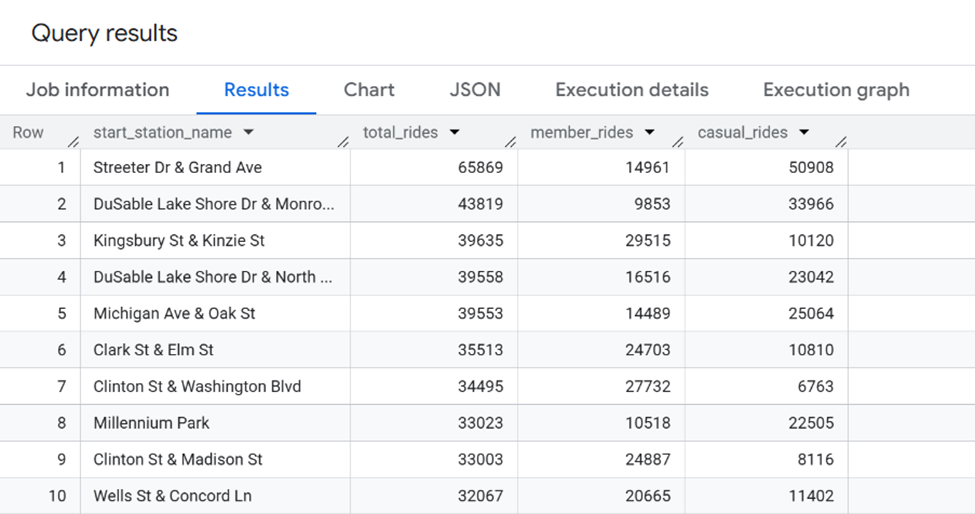

The results indicate that casual riders tend to begin their trips at stations located near popular tourist attractions, while annual members are more likely to start from areas with a high concentration of offices, such as Chicago’s financial district and River North.

Extending the geographical analysis to include route popularity provides deeper insights into how different user types utilize Cyclistic bikes.

**For Casual Riders:**

```sql
    SELECT
      CONCAT(start_station_name, ' - ', end_station_name) AS route,
      COUNT(*) AS number_of_trips  
    FROM
      `nth-infusion-454118-p6.cyclistic_data.full_year_tripdata`
    WHERE
      member_casual = 'casual'
      AND start_station_name IS NOT NULL
      AND end_station_name IS NOT NULL
    GROUP BY
      route
    ORDER BY
      number_of_trips DESC
    LIMIT 10
```

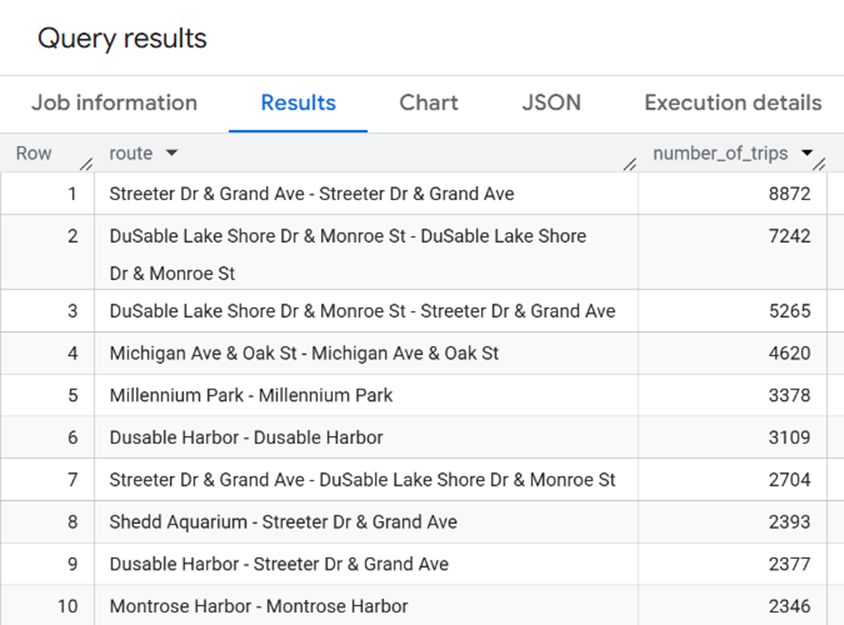

**For Annual Members:**

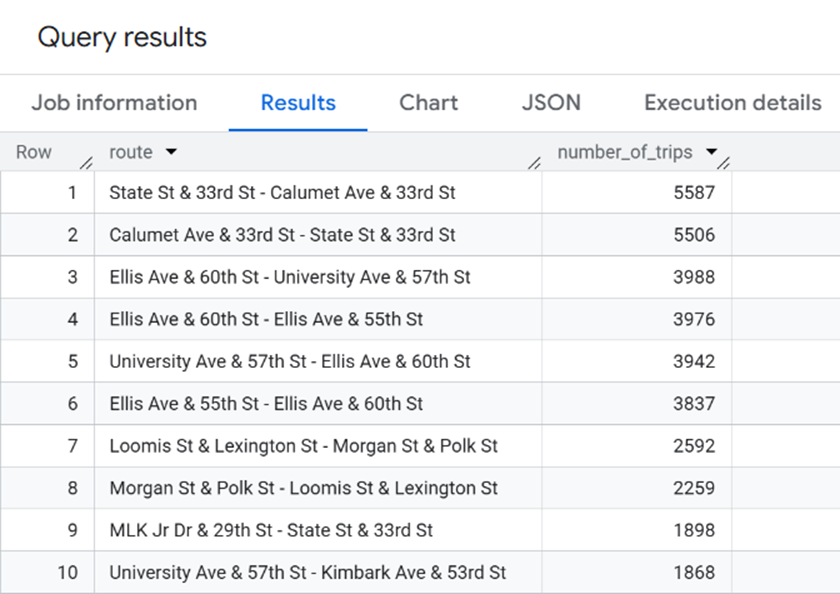

One notable pattern is the high number of loop trips among casual riders—that is, rides that start and end at the same station. This behavior suggests a recreational or sightseeing intent, where users rent bikes for a leisurely ride and return them to the original location. This idea is further supported by the fact that many of the remaining popular routes for casual riders begin or end at key tourist destinations, such as Navy Pier.

In contrast, annual members show a different usage pattern: none of their top 10 routes are loops. Instead, their most frequent routes are concentrated within college campuses, including the University of Chicago, UIC, and IIT. This strongly indicates that students are a core segment of the membership base, likely using the bikes for commuting between classes or around campus.

Determining the percentage of top 10 routes taken by casual riders can offer insight into how many students might be using these routes without holding annual memberships.

```sql
SELECT
  top_routes.route,
  trip_data.member_casual,
  COUNT(*) AS number_of_trips
FROM
  ( -- The subquery defines the top 10 most common routes for members/casual riders
    SELECT
      CONCAT(start_station_name, ' - ', end_station_name) AS route
    FROM
      `nth-infusion-454118-p6.cyclistic_data.full_year_tripdata`
    WHERE
      member_casual = 'member'
      AND start_station_name IS NOT NULL
      AND end_station_name IS NOT NULL
    GROUP BY
      route
    ORDER BY
      COUNT(*) DESC
    LIMIT 10
  ) AS top_routes
JOIN -- Join the table created in the subquery with the table with Cyclistic data
  `nth-infusion-454118-p6.cyclistic_data.full_year_tripdata` AS trip_data
ON
  CONCAT(trip_data.start_station_name, ' - ', trip_data.end_station_name) = top_routes.route
GROUP BY
  top_routes.route,
  trip_data.member_casual
```
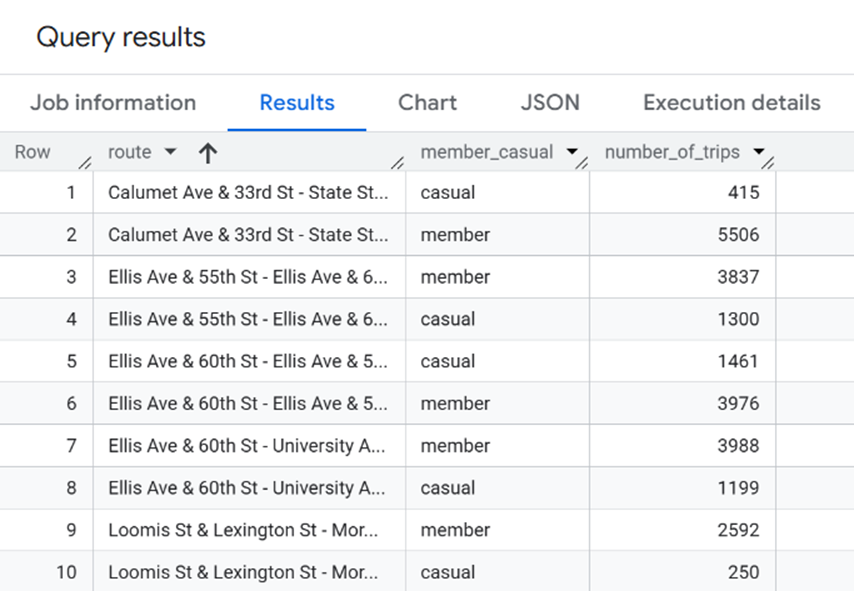
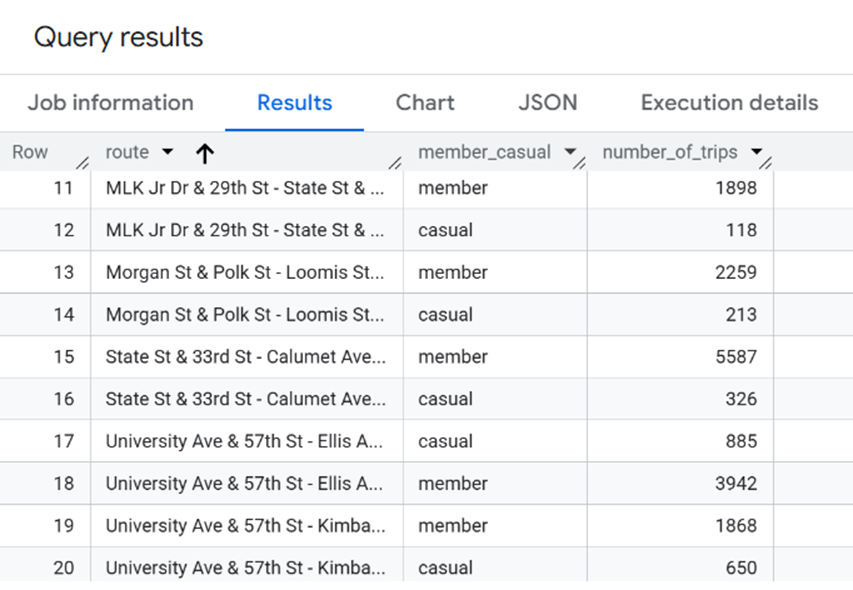

The data indicates that a notable share of rides on these routes, especially those connected to the University of Chicago, are taken by casual riders. This highlights an opportunity to increase membership awareness among UChicago students.
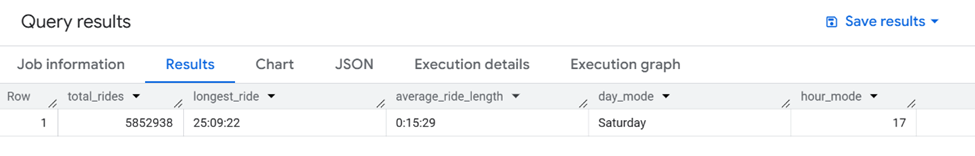
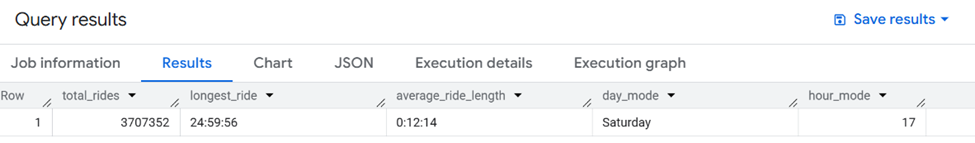
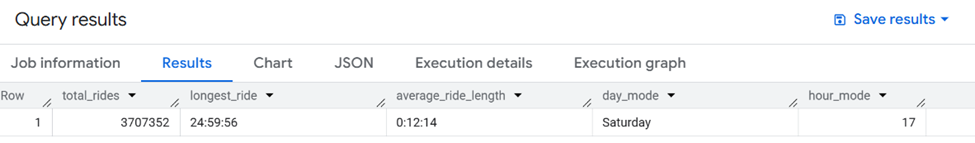
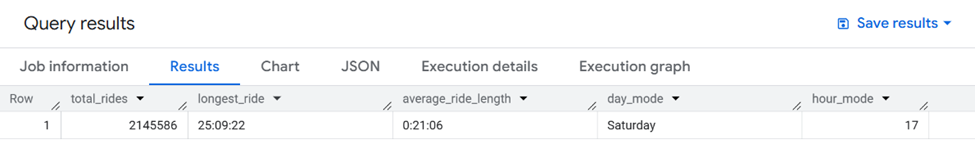
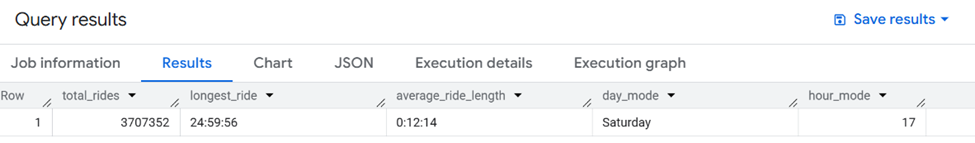
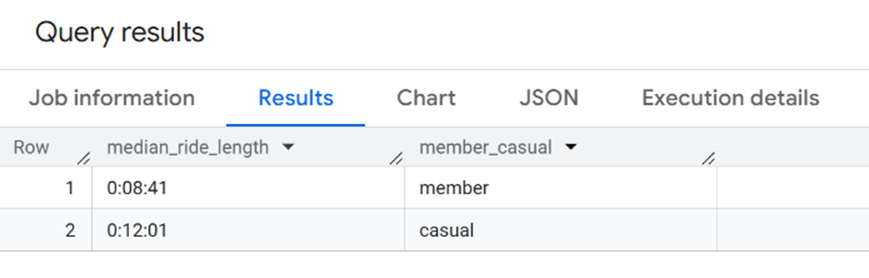
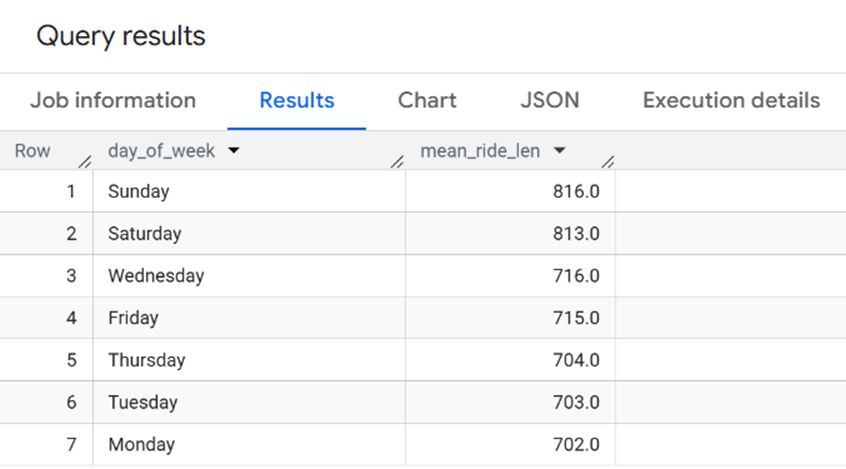
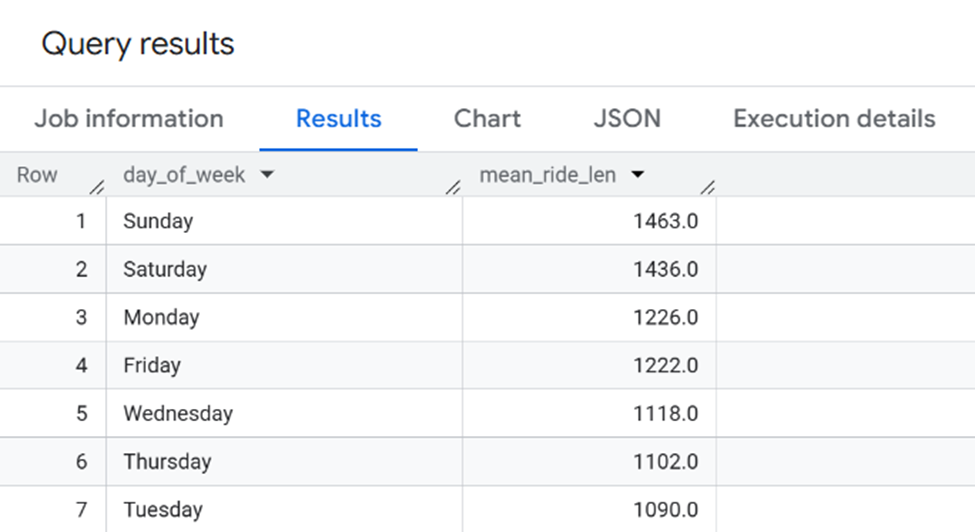
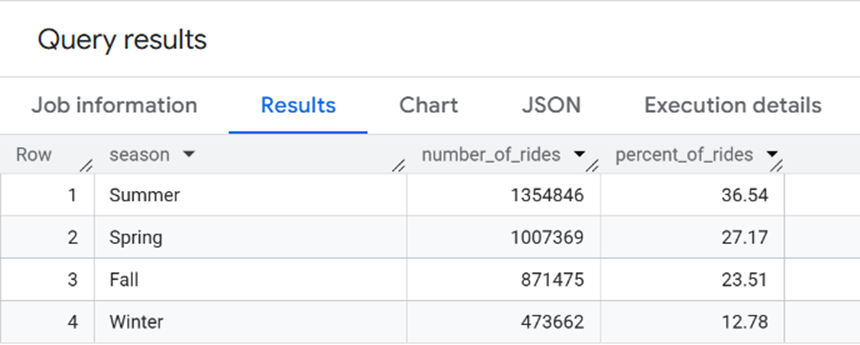
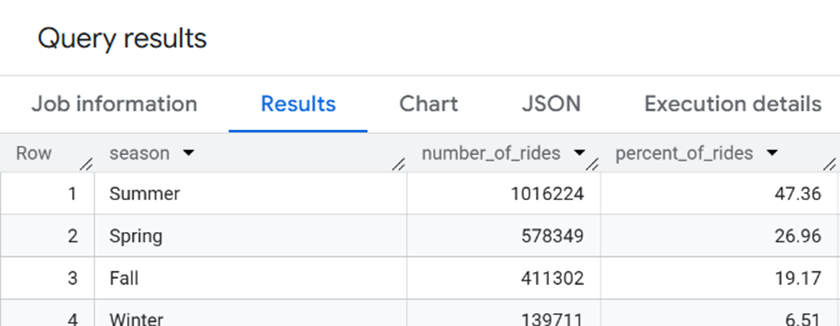
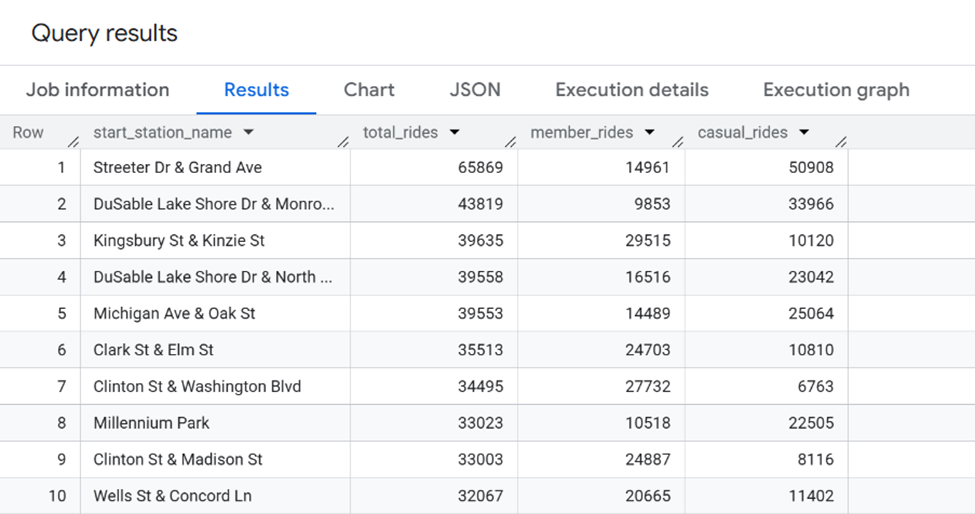
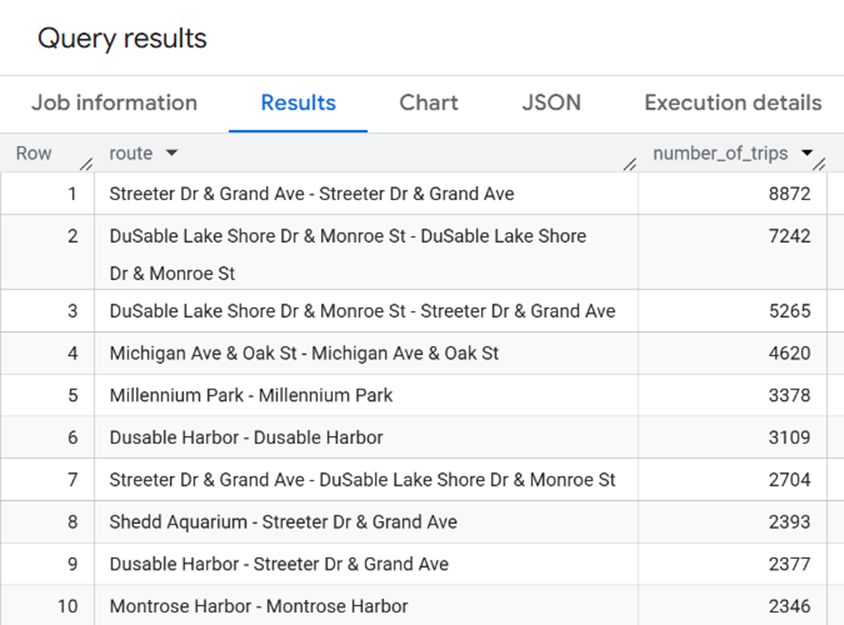
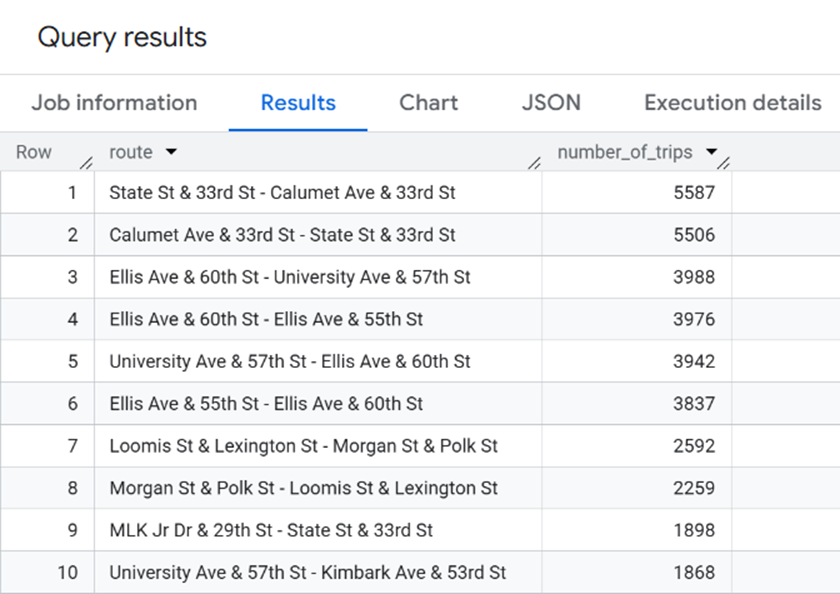
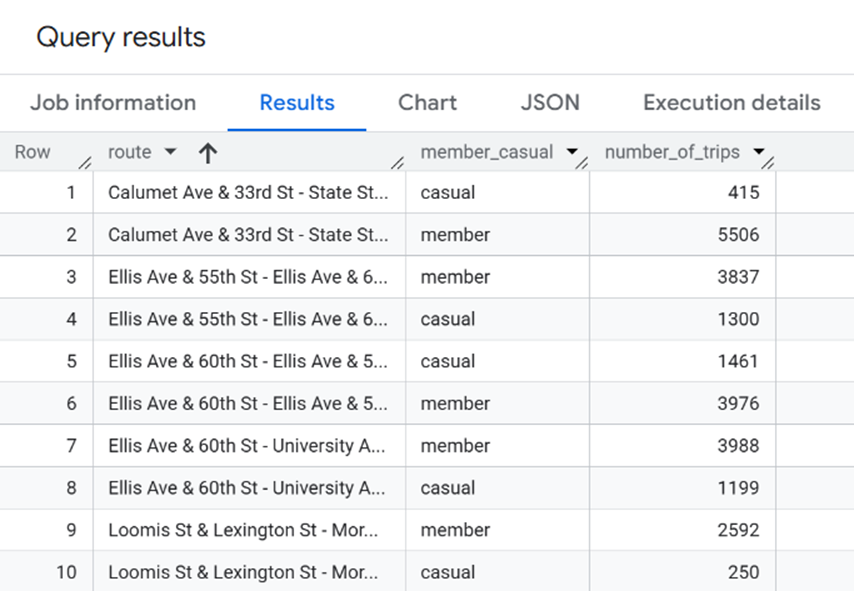
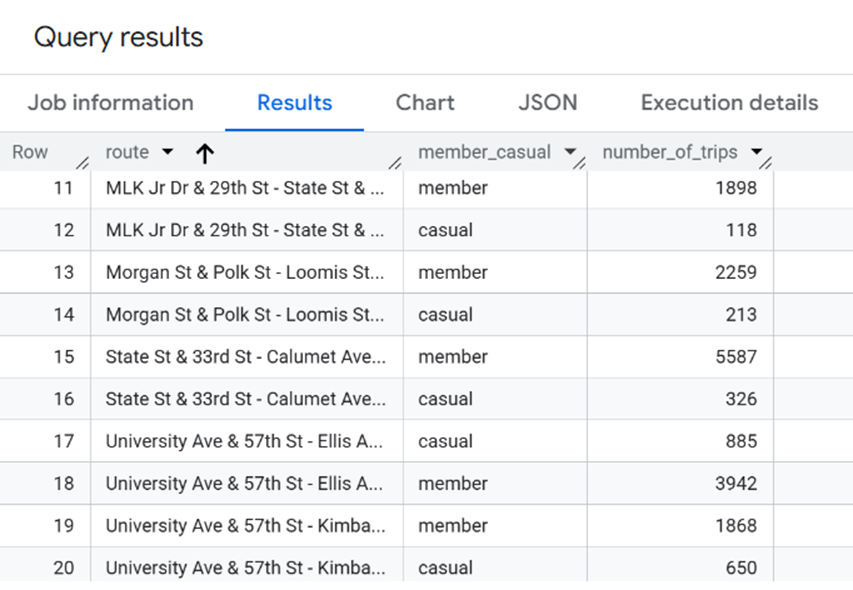

## Share: Visualizing the Data
Transforming raw analysis into visualizations helps bring depth to the metrics being evaluated. Beginning with a yearly overview reveals broad trends in demand and user behavior, providing context for deeper insights that follow.

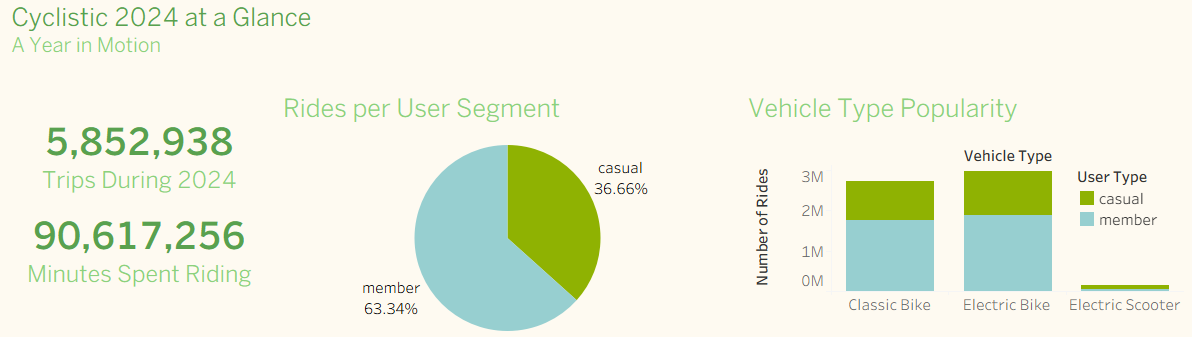
* Over **5.85 million rides** and **90.6 million minutes logged**, driven largely by **annual members (63%)**, who remain the system’s most consistent users.
* **Classic and electric bikes dominated ridership**, while scooters saw minimal traction.
* **Casual riders** represent a sizable share of trips, signaling a clear opportunity for growth through targeted engagement.

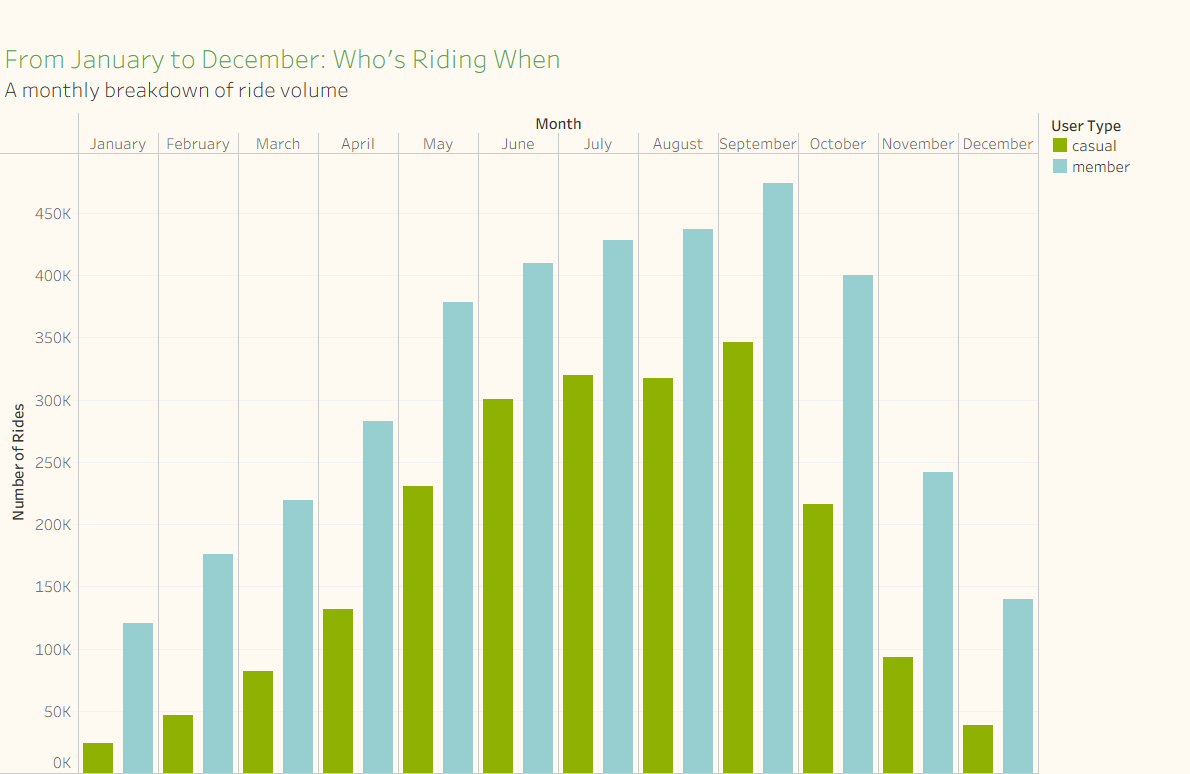
Annual members consistently rode more than casual riders year-round, with both groups peaking in September and showing highest overall activity during the summer months.

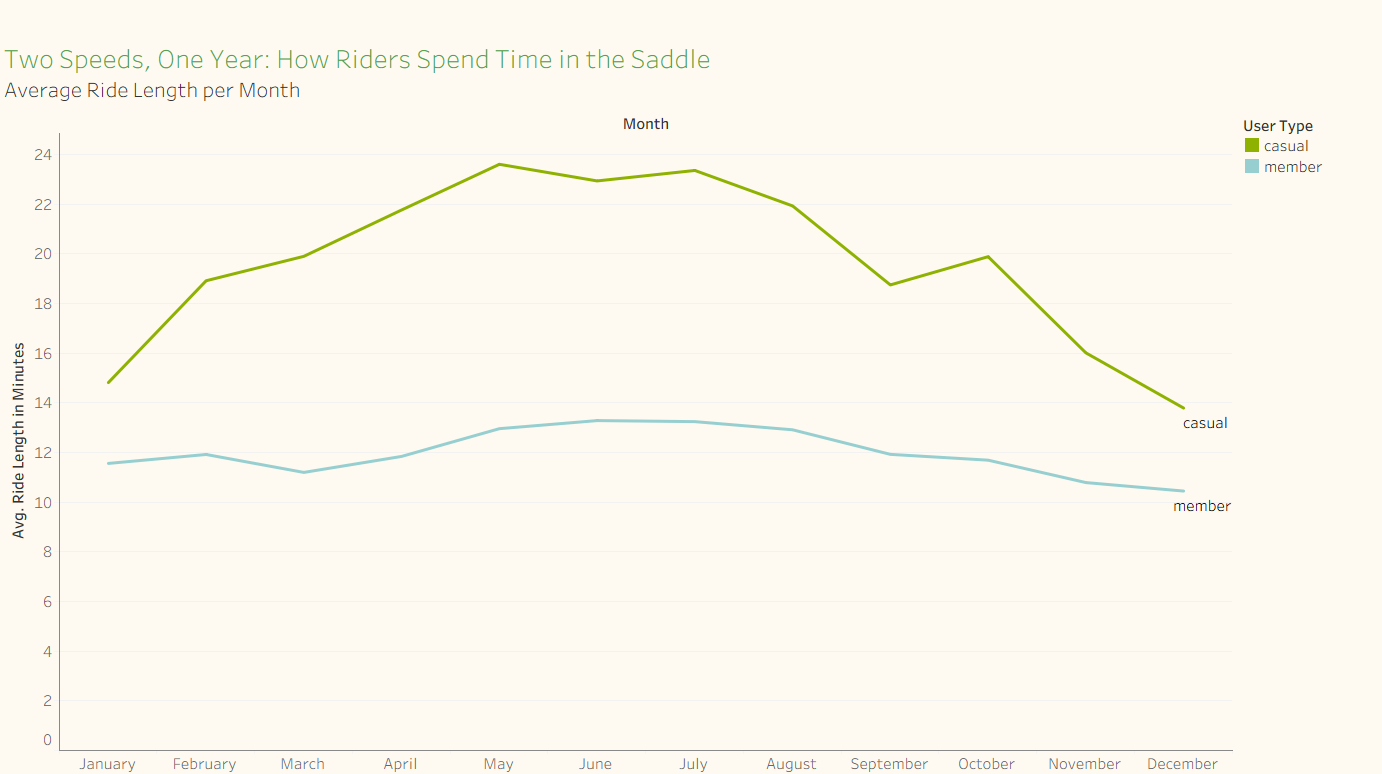
Casual riders not only peaked in volume during summer, but also took the longest rides, with May marking the top average ride duration. Annual members, meanwhile, showed consistent behavior year-round with moderate, steady ride lengths.

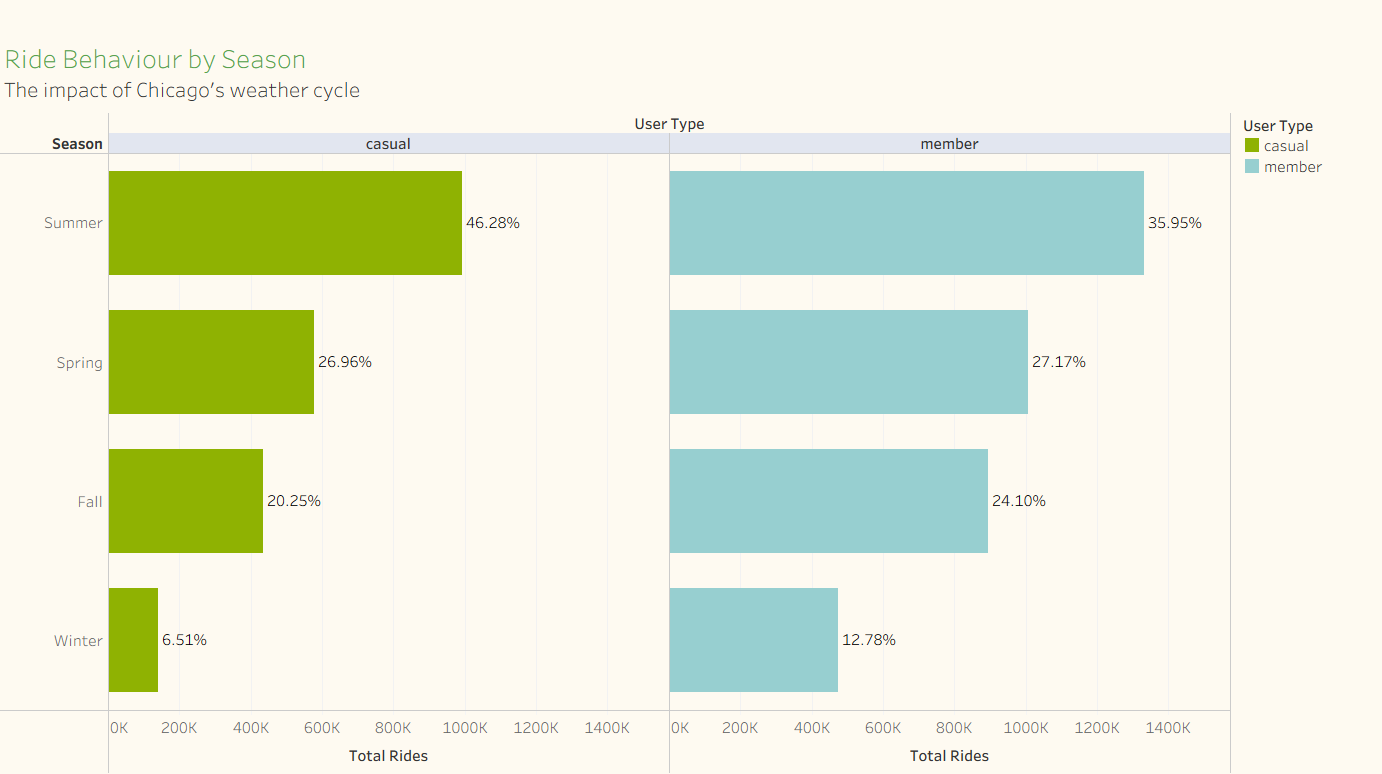
Seasonal trends reveal that casual riders overwhelmingly favor summer months, while annual members maintain steady usage across spring, summer, and fall—highlighting students and leisure users as key drivers of warm-weather demand.

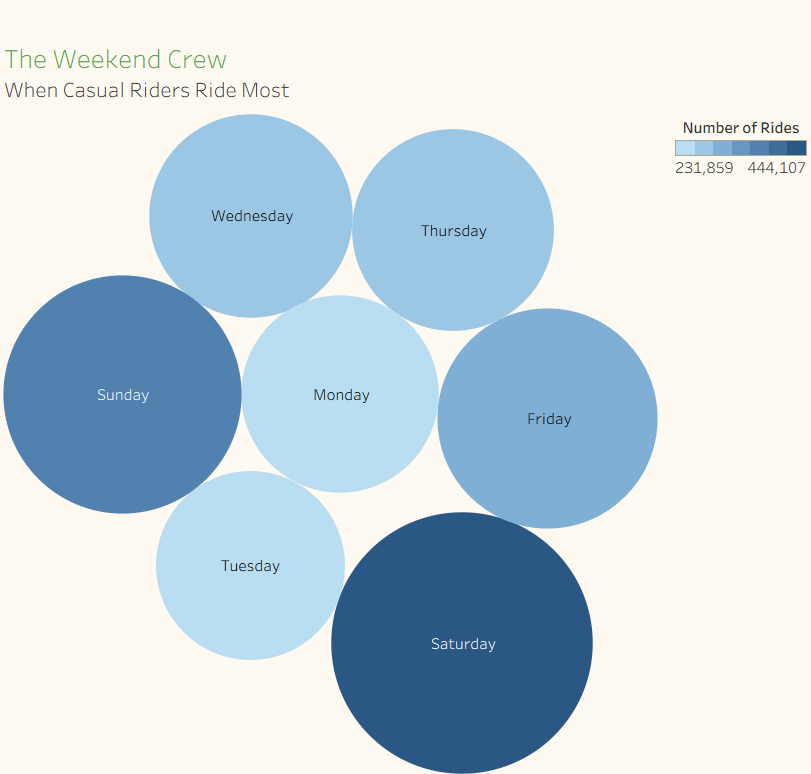

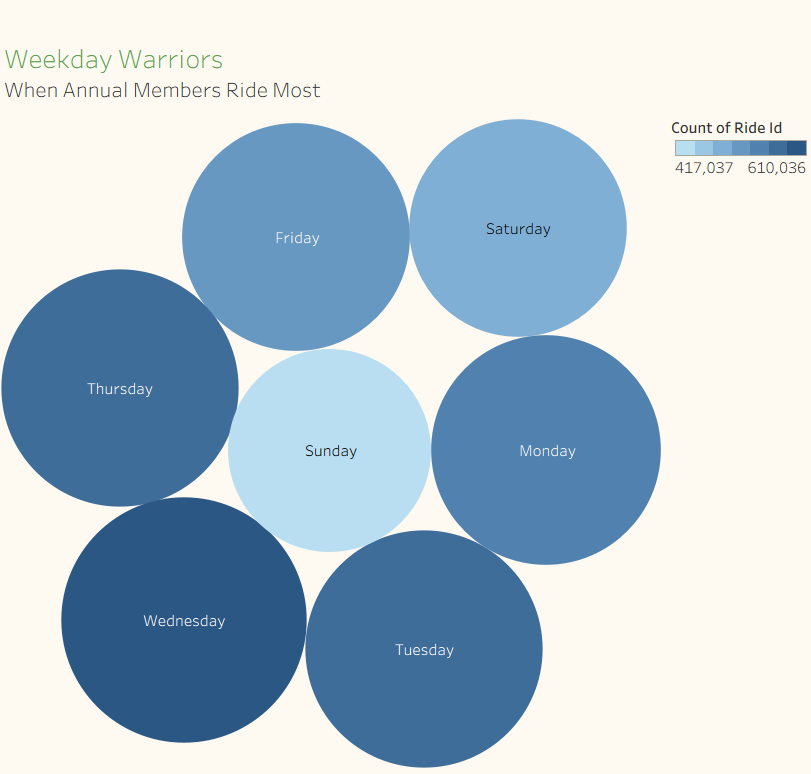

Casual riders peaked their bike usage during the weekend, while annual members consistently used bikes during the week, but dropped demand during the weekend.

Weekend and seasonal peaks suggest **casual riders may include tourists, while members exhibit weekday commuting patterns.**

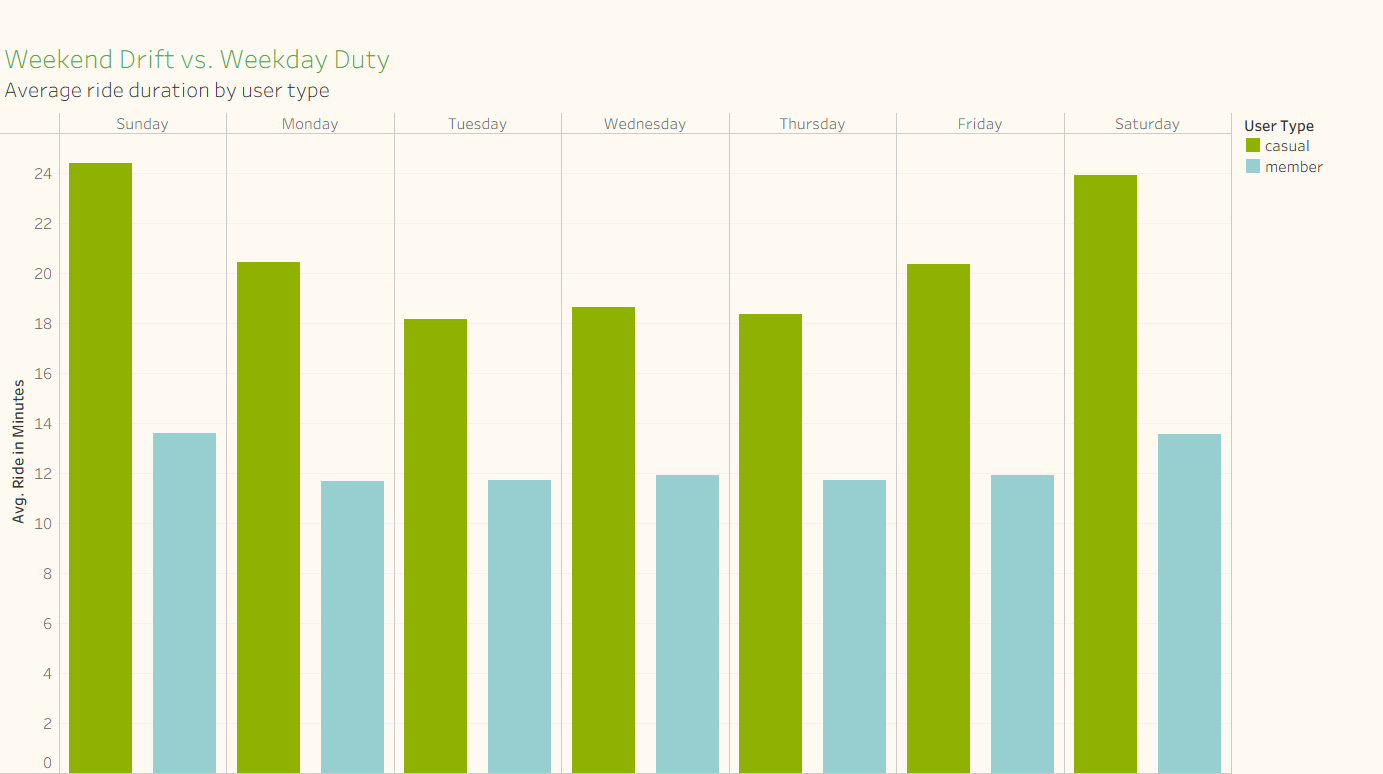
Moreover, casual riders tend to take longer trips than annual members, with average ride durations peaking on weekends.

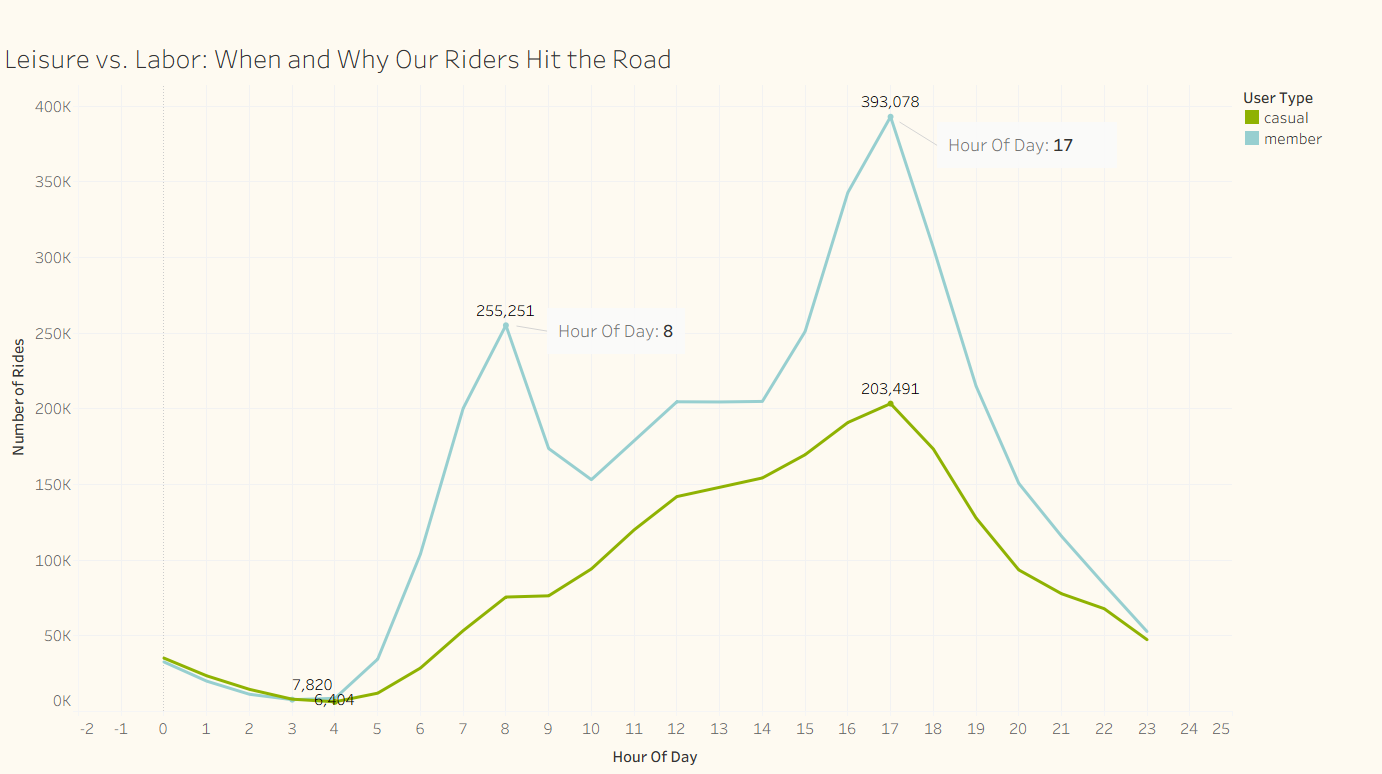
Annual members show peak ride activity during morning and evening commute hours, paired with steady weekday usage, **strongly indicating work-related travel**. In contrast, casual riders favor more flexible, leisure-oriented trips.

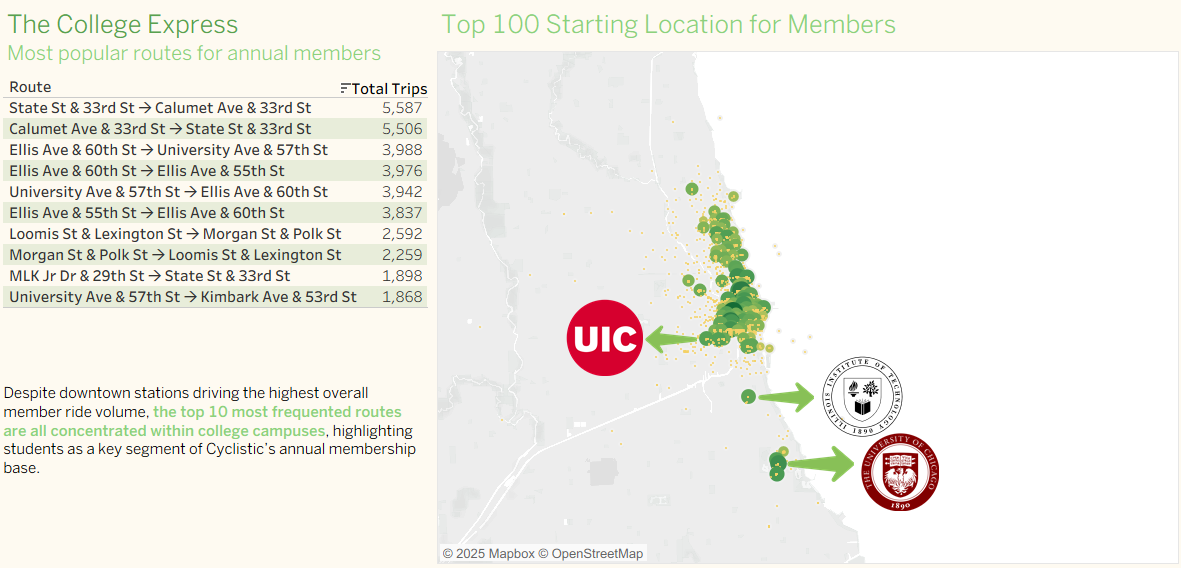

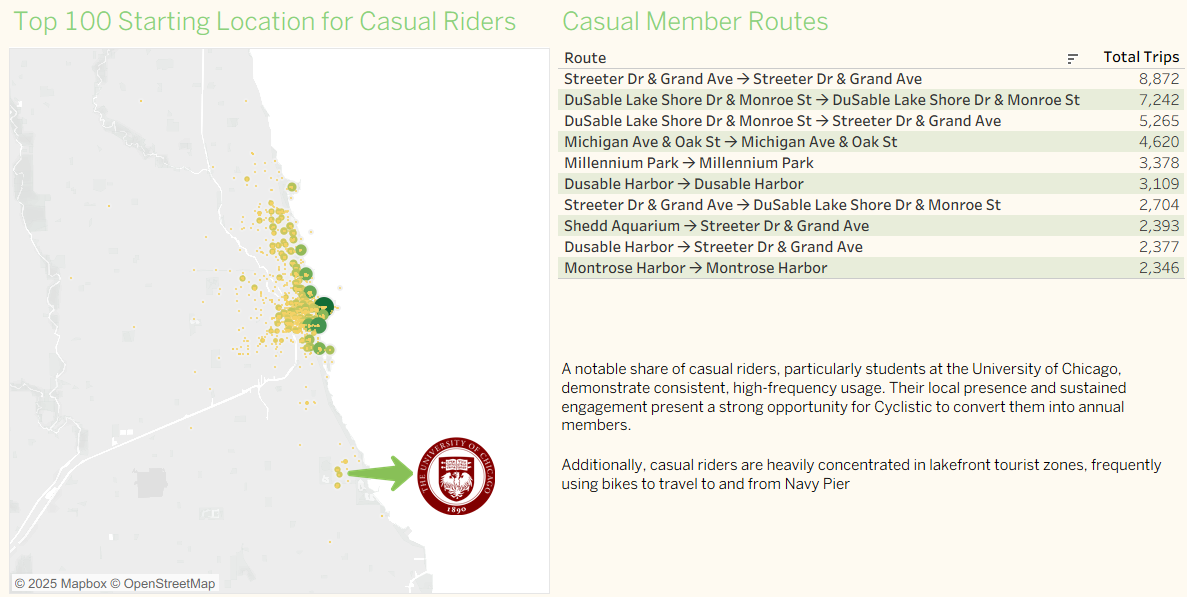
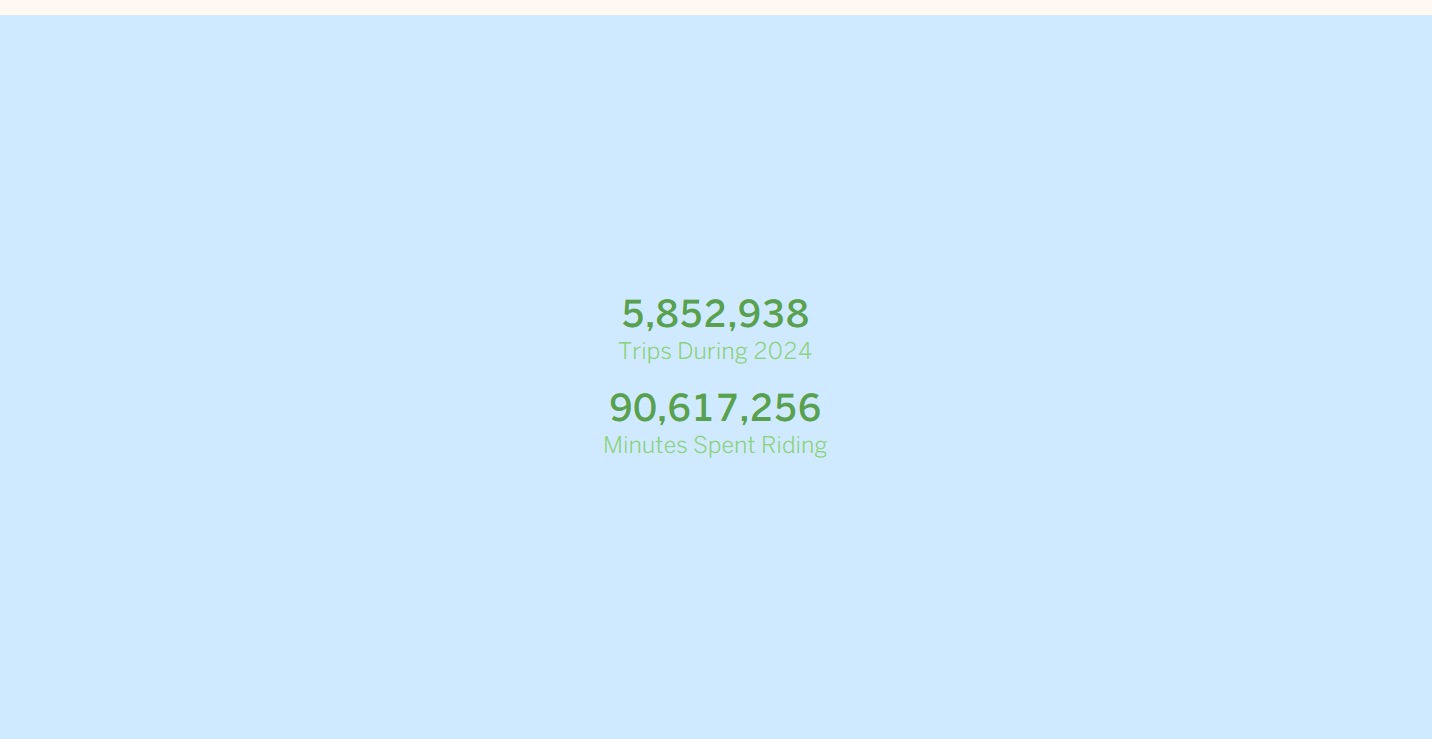
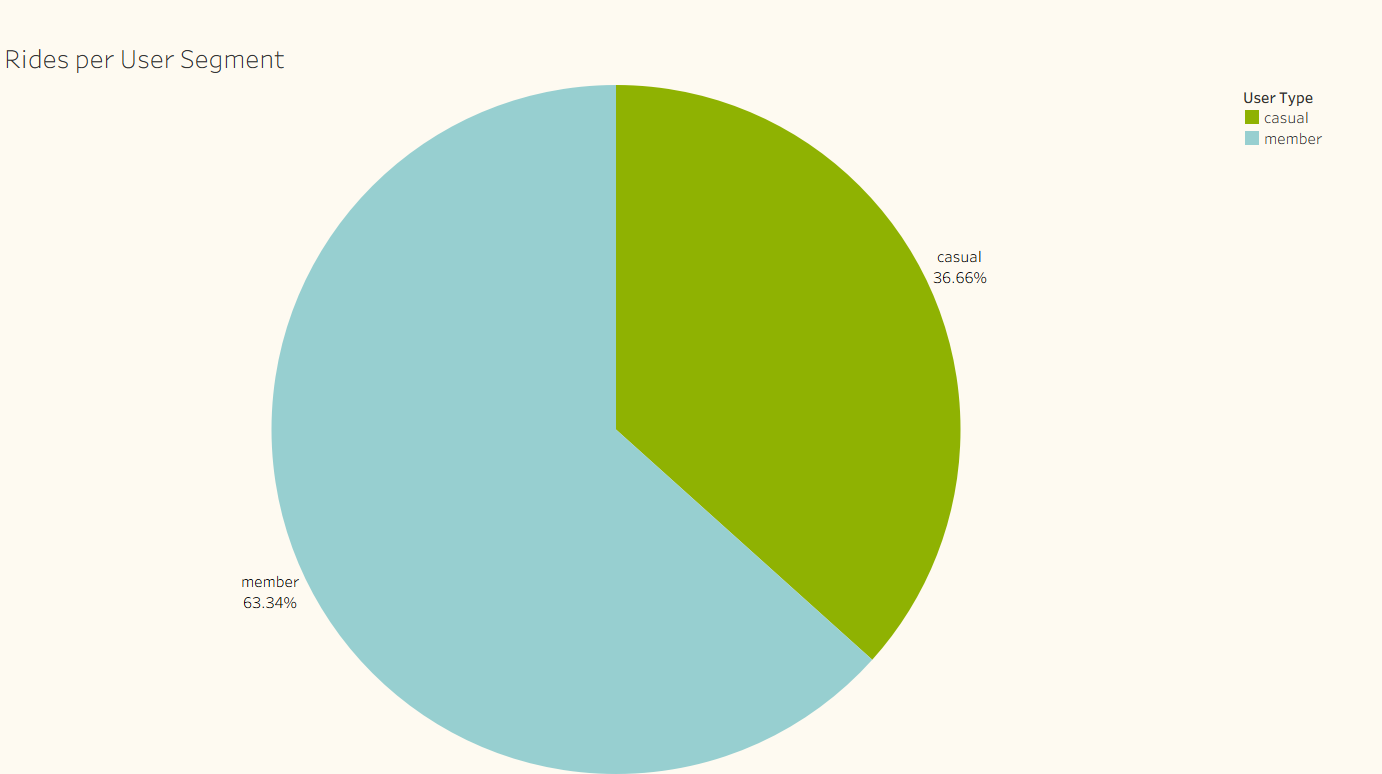
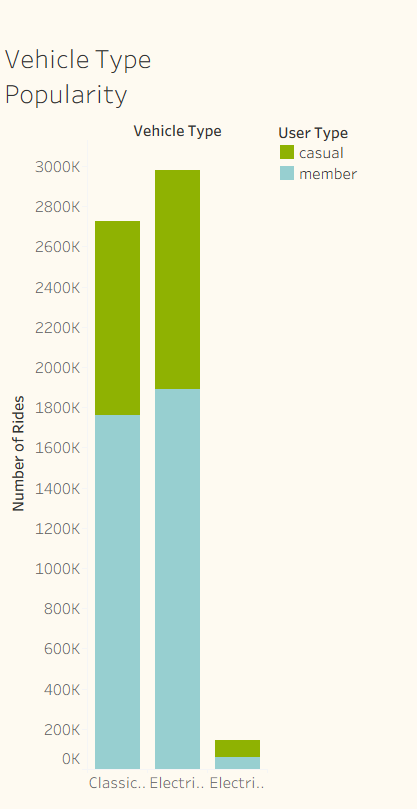
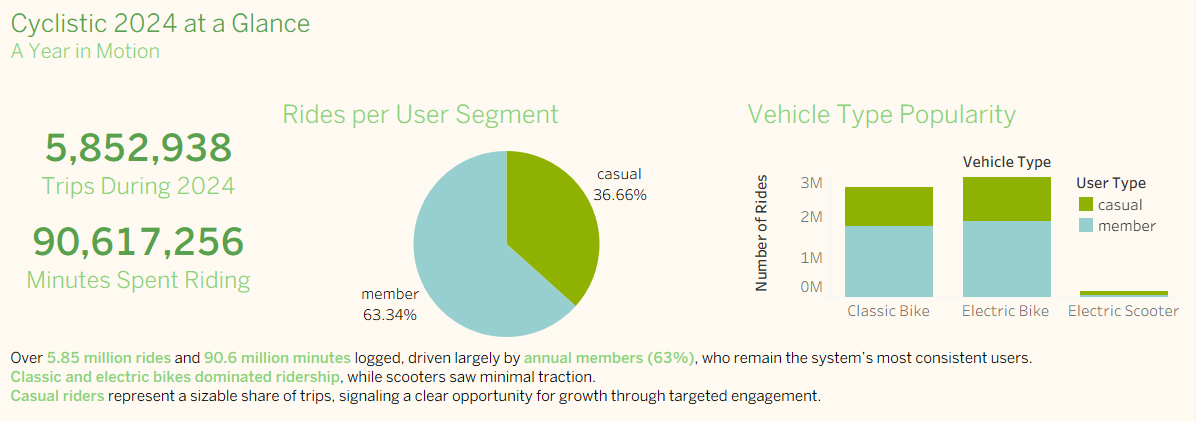

## Act: Turning Inisghts into Action
#### Conclusions
* **Members ride to work. Casuals ride for leisure.** Annual members consistently ride during weekday commute hours, indicating a strong alignment with work-related travel. Casual riders peak on weekends and in the afternoon, reinforcing recreational and tourist-driven behaviour.
* **Ride duration reflects purpose.** Casual riders take longer, more leisurely rides, especially in warmer months. Member rides are shorter and steadier, further affirming a utilitarian commuting pattern.
* **Seasonality impacts casual riders more than members.** Casual riders have a higher percentage of trips concentrated during the summer months, while members spread out their trips throughout the year, excluding the harsh winter months.
* **Campus corridors reveal a hidden split in ridership.** While members dominate volume across downtown, their highest-frequency routes trace through college campuses—zones that also show strong casual usage, likely from students riding regularly without converting to membership.
* **Casual riders cluster in tourist-heavy areas,** with Navy Pier ranking as the top starting point—likely due not only to its scenic appeal but also its limited transit access, making bike share a convenient and flexible way to reach it.

#### Recommendations
1. **Target Casual Riders in Tourist Zones with Seasonal Membership Offers.** Leverage high-traffic tourist hubs like Navy Pier by launching summer-focused campaigns that highlight membership perks, such as discounted seasonal passes, flexible ride limits, or facilitate access to locations that are harder to reach by other means.
2. **Introduce Membership Campaigns for Students at College Campuses.** Many students exhibit member-like behavior(riding regularly) but continue using casual passes. To convert this high-potential group, introduce student-specific pricing tiers, partner with universities on bundled offers, and boost awareness of cost savings and other membership benefits through targeted outreach around campuses.
3. **Peer Referals from Exisitng Members.** Encourage current members, especially students, to invite friends with referral codes or incentives like free ride credits or a free week of membership.